<a href="https://colab.research.google.com/github/D09EHA/cred40/blob/main/Credict_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Credit Card Fraud Detection
This project is related to building a Machine Learning module that can effectively detect Fraudlent Credit Card transactions and hence save money for the client Bank.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Lets examine both the datasets to decide if they needs to be merged or if it is a good idea to keep the test dataset seperate for final evaluation.

In [ ]:
# Importing both the datasets provided by kaggle
#fraud = pd.read_csv('gdrive/My Drive/Capstone Project/fraudTrain.csv')
#fraud_test = pd.read_csv('gdrive/My Drive/Capstone Project/fraudTest.csv')
fraud = pd.read_csv('/content/fraudTrain.csv')
fraud_test = pd.read_csv('/content/fraudTest.csv')

### Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Data Cleaning
- Outlier Treatment
- Variable Transformation

In [ ]:
# check for the main (training) dataset
fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
# checking for various columns and nulls in the dataset
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31151 entries, 0 to 31150
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             31151 non-null  int64  
 1   trans_date_trans_time  31151 non-null  object 
 2   cc_num                 31151 non-null  int64  
 3   merchant               31151 non-null  object 
 4   category               31151 non-null  object 
 5   amt                    31151 non-null  float64
 6   first                  31151 non-null  object 
 7   last                   31151 non-null  object 
 8   gender                 31151 non-null  object 
 9   street                 31151 non-null  object 
 10  city                   31150 non-null  object 
 11  state                  31150 non-null  object 
 12  zip                    31150 non-null  float64
 13  lat                    31150 non-null  float64
 14  long                   31150 non-null  float64
 15  ci

In [ ]:
# basic inspection of the test dataset
fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31124 entries, 0 to 31123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             31124 non-null  int64  
 1   trans_date_trans_time  31124 non-null  object 
 2   cc_num                 31123 non-null  float64
 3   merchant               31123 non-null  object 
 4   category               31123 non-null  object 
 5   amt                    31123 non-null  float64
 6   first                  31123 non-null  object 
 7   last                   31123 non-null  object 
 8   gender                 31123 non-null  object 
 9   street                 31123 non-null  object 
 10  city                   31123 non-null  object 
 11  state                  31123 non-null  object 
 12  zip                    31123 non-null  float64
 13  lat                    31123 non-null  float64
 14  long                   31123 non-null  float64
 15  ci

In [ ]:
# checking % of data provided by Kaggle in the train & test
1296675 * 100 / (1296675 + 555719)

69.99995681264353

- 70% data is present in the train dataset and remaining 30% in the test dataset.
- No null values in either of the files

In [ ]:
# Check for imbalance on target variable in the train dataset
fraud.is_fraud.value_counts(normalize=True)

0.0    0.99008
1.0    0.00992
Name: is_fraud, dtype: float64

Fraud Distribution
0.0    0.99008
1.0    0.00992
Name: is_fraud, dtype: float64


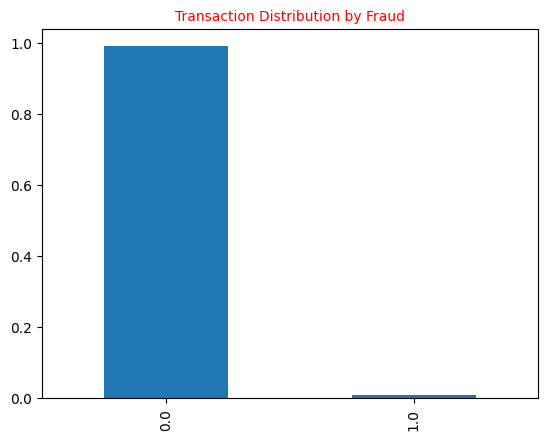

In [ ]:
# Check for imbalance on target variable in the main dataset
print ('Fraud Distribution')
print (fraud.is_fraud.value_counts(normalize=True))
plt.title('Transaction Distribution by Fraud', fontsize= 10, color = 'Red', fontweight = 100)
fraud.is_fraud.value_counts(normalize=True).plot.bar()
plt.show()

In [ ]:
# Check for imbalance on target variable in the test dataset
fraud_test.is_fraud.value_counts(normalize=True)

0.0    0.995662
1.0    0.004338
Name: is_fraud, dtype: float64

Both the datasets have high imbalnce of the target variable with the test dataset having slightly higher imbalance. At this point, lets keep the test data seperate. We will be building the model on the train dataset. If required, a validation dataset will be carved from it. The final evaluation will be done on the test dataset.

### Univariate Analysis
The following columns seems of very less/ no significance in determining a fraud case. Primary reason being no model can be created based on person's name or his PII or some unique ID/ S.no. assigned.

In [ ]:
# Dropping the unwanted columns from both datasets
fraud.drop(['cc_num','first','last','gender', 'street','city', 'state', 'zip','unix_time','trans_num'], axis=1, inplace=True)
fraud.drop(fraud.iloc[:,[0]], axis=1, inplace=True)
fraud_test.drop(['cc_num','first','last','gender','street', 'city', 'state', 'zip','unix_time','trans_num'], axis=1, inplace=True)
fraud_test.drop(fraud_test.iloc[:,[0]], axis=1, inplace=True)

In [ ]:
# Inspecting the fraud dataset
fraud.head()

,trans_date_trans_time,merchant,category,amt,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0.0


In [ ]:
# Inspecting the fraud test dataset
fraud_test.head()

,trans_date_trans_time,merchant,category,amt,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,33.986391,-81.200714,0.0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0.0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,40.495810,-74.196111,0.0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,28.5697,-80.8191,54767.0,Set designer,1987-07-25,28.812398,-80.883061,0.0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,44.959148,-85.884734,0.0


In [ ]:
fraud.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
fraud.fillna(fraud.mean())
fraud.fillna(fraud.median())
fraud.fillna(fraud.mode().iloc[0])

,trans_date_trans_time,merchant,category,amt,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31146,2019-01-19 16:32:18,"fraud_Lesch, D'Amore and Brown",food_dining,166.48,31.9290,-97.6443,2526.0,Phytotherapist,1970-11-12,32.616988,-97.509247,0.0
31147,2019-01-19 16:33:30,"fraud_Torp, Muller and Borer",health_fitness,1.15,41.4193,-99.3844,73.0,Product designer,1935-02-10,40.534852,-98.720506,0.0
31148,2019-01-19 16:33:50,fraud_Jacobi Inc,health_fitness,72.92,37.1046,-83.5706,467.0,"Psychologist, forensic",1984-06-04,37.505811,-82.874039,0.0
31149,2019-01-19 16:34:54,fraud_Reichel LLC,personal_care,3.04,34.1556,-118.2322,172817.0,Advertising account planner,1982-07-30,34.399891,-118.092352,0.0


In [ ]:
fraud['dob'].fillna(method='ffill', inplace=True)

In [ ]:
# Converting dob to age
from datetime import date
fraud['dob'] = pd.to_datetime(fraud['dob'])
fraud['age'] = (pd.to_datetime('now') - fraud['dob'])/ np.timedelta64(1, 'Y')
fraud['age'] = fraud['age'].astype(int)
fraud.drop(['dob'], axis=1, inplace=True)
fraud.head()

,trans_date_trans_time,merchant,category,amt,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,36.0788,-81.1781,3495.0,"Psychologist, counselling",36.011293,-82.048315,0.0,35
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,48.8878,-118.2105,149.0,Special educational needs teacher,49.159047,-118.186462,0.0,45
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,42.1808,-112.2620,4154.0,Nature conservation officer,43.150704,-112.154481,0.0,61
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,46.2306,-112.1138,1939.0,Patent attorney,47.034331,-112.561071,0.0,56
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,38.4207,-79.4629,99.0,Dance movement psychotherapist,38.674999,-78.632459,0.0,37


In [ ]:
fraud_test['dob'].fillna(method='ffill', inplace=True)

In [ ]:
# Same change on the test dataset
fraud_test['dob'] = pd.to_datetime(fraud_test['dob'])
fraud_test['age'] = (pd.to_datetime('now') - fraud_test['dob'])/ np.timedelta64(1, 'Y')
fraud_test['age'] = fraud_test['age'].astype(int)
fraud_test.drop(['dob'], axis=1, inplace=True)
fraud_test.head()

,trans_date_trans_time,merchant,category,amt,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,33.9659,-80.9355,333497.0,Mechanical engineer,33.986391,-81.200714,0.0,55
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,40.3207,-110.4360,302.0,"Sales professional, IT",39.450498,-109.960431,0.0,33
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,40.6729,-73.5365,34496.0,"Librarian, public",40.495810,-74.196111,0.0,53
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,28.5697,-80.8191,54767.0,Set designer,28.812398,-80.883061,0.0,36
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,44.2529,-85.0170,1126.0,Furniture designer,44.959148,-85.884734,0.0,68


In [ ]:
# Seggregating data and time from trans_date_trans_time field
fraud['trans_date'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).date
fraud['trans_time'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).time
fraud.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud.head()

,merchant,category,amt,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,36.0788,-81.1781,3495.0,"Psychologist, counselling",36.011293,-82.048315,0.0,35,2019-01-01,00:00:18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,48.8878,-118.2105,149.0,Special educational needs teacher,49.159047,-118.186462,0.0,45,2019-01-01,00:00:44
2,fraud_Lind-Buckridge,entertainment,220.11,42.1808,-112.2620,4154.0,Nature conservation officer,43.150704,-112.154481,0.0,61,2019-01-01,00:00:51
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,46.2306,-112.1138,1939.0,Patent attorney,47.034331,-112.561071,0.0,56,2019-01-01,00:01:16
4,fraud_Keeling-Crist,misc_pos,41.96,38.4207,-79.4629,99.0,Dance movement psychotherapist,38.674999,-78.632459,0.0,37,2019-01-01,00:03:06


In [ ]:
# Same changes on test dataset
fraud_test['trans_date'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).date
fraud_test['trans_time'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).time
fraud_test.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud_test.head()

,merchant,category,amt,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,fraud_Kirlin and Sons,personal_care,2.86,33.9659,-80.9355,333497.0,Mechanical engineer,33.986391,-81.200714,0.0,55,2020-06-21,12:14:25
1,fraud_Sporer-Keebler,personal_care,29.84,40.3207,-110.4360,302.0,"Sales professional, IT",39.450498,-109.960431,0.0,33,2020-06-21,12:14:33
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,40.6729,-73.5365,34496.0,"Librarian, public",40.495810,-74.196111,0.0,53,2020-06-21,12:14:53
3,fraud_Haley Group,misc_pos,60.05,28.5697,-80.8191,54767.0,Set designer,28.812398,-80.883061,0.0,36,2020-06-21,12:15:15
4,fraud_Johnston-Casper,travel,3.19,44.2529,-85.0170,1126.0,Furniture designer,44.959148,-85.884734,0.0,68,2020-06-21,12:15:17


In [ ]:
# Check on numeric columns for outliers
fraud.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,age
count,31151.000000,31150.000000,31150.000000,3.115000e+04,31150.000000,31150.000000,31150.000000,31151.000000
mean,71.972223,38.536202,-90.245248,8.905872e+04,38.536572,-90.247639,0.009920,49.831434
std,148.381965,5.096907,13.920543,2.976224e+05,5.126436,13.937947,0.099104,17.313087
min,1.000000,20.027100,-165.672300,2.300000e+01,19.040141,-166.629875,0.000000,18.000000
25%,9.710000,34.668900,-96.809400,7.440000e+02,34.781559,-96.972432,0.000000,36.000000
50%,48.090000,39.342600,-87.461600,2.471000e+03,39.345150,-87.424560,0.000000,48.000000
75%,83.870000,41.846700,-80.128400,2.047800e+04,41.919813,-80.167952,0.000000,61.000000
max,11872.210000,65.689900,-67.950300,2.906700e+06,66.659242,-66.967742,1.000000,99.000000


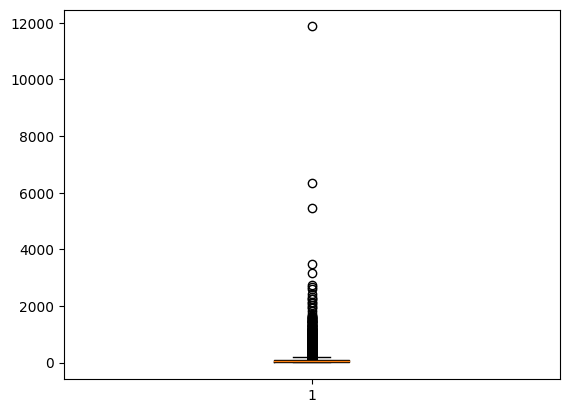

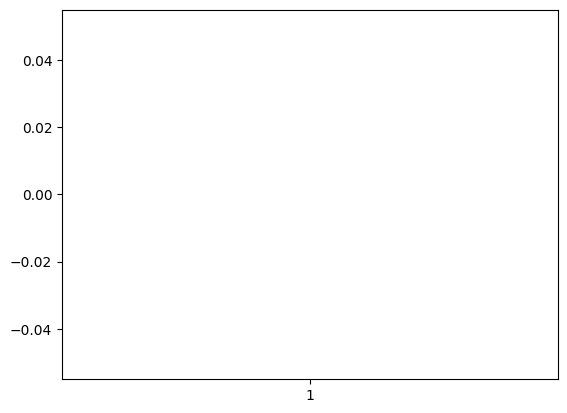

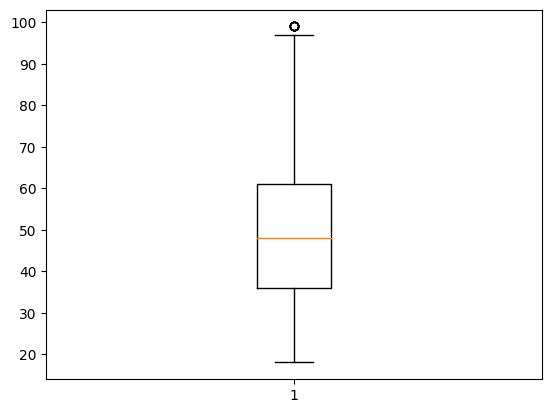

In [ ]:
# Further checking distribution of continuous variables - amt, city_pop and age columns to see if there are any valid outliers
plt.boxplot(fraud.amt)
plt.show()
plt.boxplot(fraud.city_pop)
plt.show()
plt.boxplot(fraud.age)
plt.show()

The age column has no outliers while amt and city_pop stastically shows outliers. However, both amount and city population can vary drastically and none of them seems very high or very low. Hence, we will consider it as valid data.

In [ ]:
# Identifying all the Numeric and non numeric columns
num = []
obj = []
for i in range (0,13):
    if fraud.iloc[:,i].dtype != 'O':
        num.append(i)
    else:
        obj.append(i)
print(num)
print(obj)
col_names = fraud.columns
print(col_names)

[2, 3, 4, 5, 7, 8, 9, 10]
[0, 1, 6, 11, 12]
Index(['merchant', 'category', 'amt', 'lat', 'long', 'city_pop', 'job',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'trans_date',
       'trans_time'],
      dtype='object')


In [ ]:
# Checking the distribution of object variables
for i in obj:
    print (col_names[i])
    print (fraud.iloc[:,i].value_counts(normalize=True))
    print ('*' * 50)

merchant
fraud_Cormier LLC                       0.003306
fraud_Kilback LLC                       0.003146
fraud_Dickinson Ltd                     0.003050
fraud_Boyer PLC                         0.002793
fraud_Medhurst Inc                      0.002697
                                          ...   
fraud_Leannon-Nikolaus                  0.000385
fraud_Kessler Group                     0.000385
fraud_Lemke and Sons                    0.000353
fraud_Reichert-Weissnat                 0.000353
fraud_Medhurst, Labadie and Gottlieb    0.000321
Name: merchant, Length: 693, dtype: float64
**************************************************
category
gas_transport     0.100671
home              0.096819
grocery_pos       0.095182
shopping_pos      0.090591
kids_pets         0.084588
shopping_net      0.075728
entertainment     0.072550
food_dining       0.072004
personal_care     0.070142
health_fitness    0.066194
misc_pos          0.059099
misc_net          0.050753
grocery_net       0.0357

### Bi-Variate Analysis
Check for the behaviour of various columns against the is_fraud column

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31151 entries, 0 to 31150
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    31151 non-null  object 
 1   category    31151 non-null  object 
 2   amt         31151 non-null  float64
 3   lat         31150 non-null  float64
 4   long        31150 non-null  float64
 5   city_pop    31150 non-null  float64
 6   job         31150 non-null  object 
 7   merch_lat   31150 non-null  float64
 8   merch_long  31150 non-null  float64
 9   is_fraud    31150 non-null  float64
 10  age         31151 non-null  int64  
 11  trans_date  31151 non-null  object 
 12  trans_time  31151 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 3.1+ MB


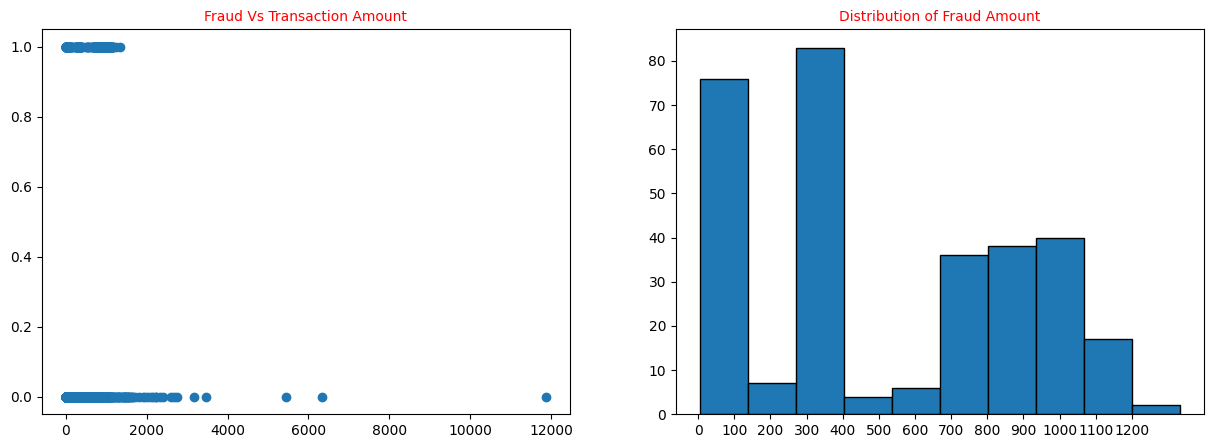

In [ ]:
# Fraud Vs Amount
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title('Fraud Vs Transaction Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.amt, fraud.is_fraud)
plt.subplot(1,2,2)
#fraud.groupby('is_fraud')['amt'].mean().plot.bar()
#plt.xticks((0,1),['Not Fraud', 'Fraud'])
#plt.xticks(rotation=0)
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Fraud Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.amt, edgecolor='Black')
plt.xticks(np.arange(0, 1300, step=100))

plt.show()

As can be seen from above, frauds are happening in transactions with lower amount hence indicating there is a relation in them.

In [ ]:
# Fraud transactions Vs merchant
# Total number of transactions per merchant
merch_tran_total = fraud.sort_values('merchant').groupby('merchant').count()['is_fraud']
merch_tran_total.head()

merchant
fraud_Abbott-Rogahn                 46
fraud_Abbott-Steuber                47
fraud_Abernathy and Sons            34
fraud_Abshire PLC                   43
fraud_Adams, Kovacek and Kuhlman    14
Name: is_fraud, dtype: int64

In [ ]:
# Total fraud transactions per merchant
merch_tran_fraud = fraud[fraud.is_fraud == 1]['merchant'].value_counts()
merch_tran_fraud.head()

fraud_Bauch-Raynor      5
fraud_Koepp-Witting     4
fraud_O'Keefe-Hudson    4
fraud_Koepp-Parker      4
fraud_Murray-Smitham    4
Name: merchant, dtype: int64

In [ ]:
# Percent of fraud transactions per merchant
fraud_perc = merch_tran_fraud/ merch_tran_total * 100
fraud_perc.sort_values(ascending=False)

fraud_Jones, Sawayn and Romaguera    10.714286
fraud_Baumbach, Feeney and Morar      9.375000
fraud_Towne, Greenholt and Koepp      8.823529
fraud_Bauch-Raynor                    8.333333
fraud_Murray-Smitham                  7.272727
                                       ...    
fraud_Zboncak Ltd                          NaN
fraud_Zemlak Group                         NaN
fraud_Zemlak, Tillman and Cremin           NaN
fraud_Ziemann-Waters                       NaN
fraud_Zulauf LLC                           NaN
Length: 693, dtype: float64

Baring a few merchants, most of them have equal distribution of transactions and hence this field may play important role in the model. Changing the alphabetic values to numeric as models expects numeric data.

In [ ]:
# variable transformation - merchant
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fraud.merchant = label_encoder.fit_transform(fraud.merchant)
fraud_test.merchant = label_encoder.fit_transform(fraud_test.merchant)

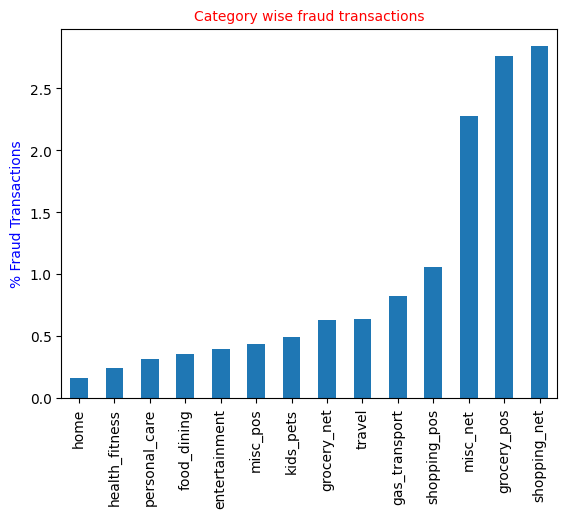

In [ ]:
# category Vs fraud
# Percent distribution of fraud based on transaction category
cat_tran_total = fraud.sort_values('category').groupby('category').count()['is_fraud']
cat_tran_fraud = fraud[fraud.is_fraud == 1]['category'].value_counts()
fraud_perc = cat_tran_fraud/ cat_tran_total * 100
plt.title('Category wise fraud transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values().plot.bar()
plt.show()

In [ ]:
# Transforming alphabetic category data into numeric to be processed by the model
fraud.category = label_encoder.fit_transform(fraud.category)
fraud_test.category = label_encoder.fit_transform(fraud_test.category)

In [ ]:
fraud_perc.sort_values(ascending=False).head()

shopping_net     2.840187
grocery_pos      2.765599
misc_net         2.277040
shopping_pos     1.063076
gas_transport    0.829082
dtype: float64

This is very significant. While the number of transactions in DE is very less, all of them are fraud transaction. Rest all the states have very low fraud transaction.

In [ ]:
# Job Vs Fraud
# Percent distribution of fraud based on Job
job_tran_total = fraud.sort_values('job').groupby('job').count()['is_fraud']
job_tran_fraud = fraud[fraud.is_fraud == 1]['job'].value_counts()
fraud_perc = job_tran_fraud/ job_tran_total * 100
fraud_perc.sort_values(ascending=False).head(20)

Solicitor, Scotland              47.826087
Horticultural consultant         33.333333
Medical technical officer        32.352941
Nutritional therapist            25.000000
Event organiser                  23.404255
Public affairs consultant        22.641509
Glass blower/designer            20.833333
Geochemist                       17.808219
Administrator, education         17.241379
Product designer                 16.176471
Soil scientist                   15.384615
Research officer, trade union    15.217391
Geologist, wellsite              14.285714
Surveyor, minerals               12.121212
Financial trader                 11.290323
Retail merchandiser              10.000000
Audiological scientist            9.933775
Engineer, mining                  9.782609
Scientist, biomedical             9.000000
Multimedia programmer             8.661417
dtype: float64

There seems certain jobs that have real high % of fraud transactions.

In [ ]:
# Transforming alphabetic job data into numeric to be processed by the model
fraud.job = label_encoder.fit_transform(fraud.job)
fraud_test.job = label_encoder.fit_transform(fraud_test.job)

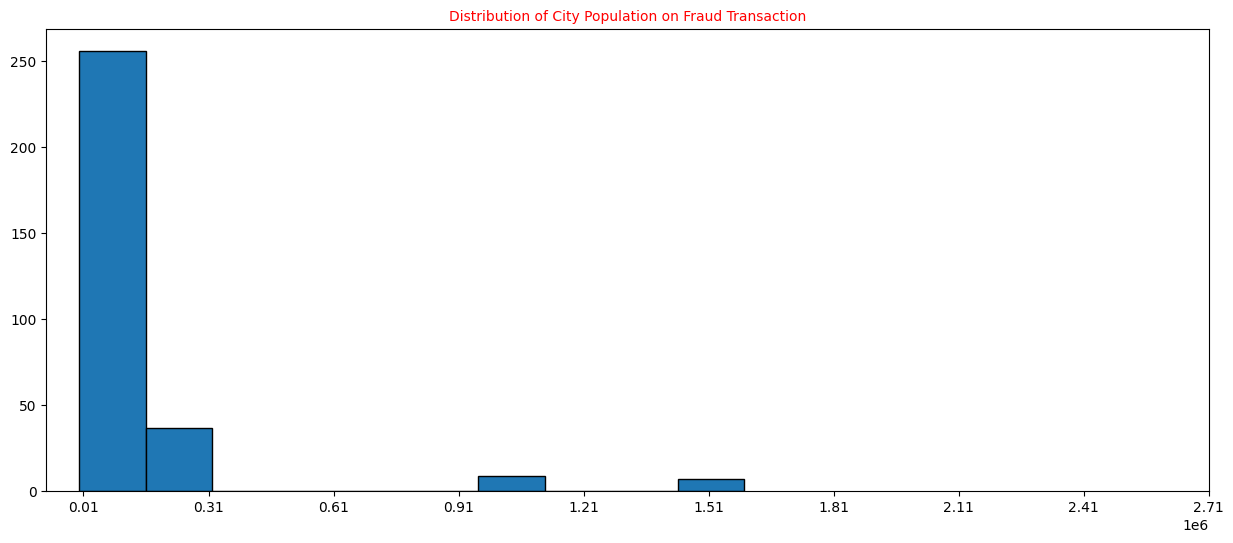

In [ ]:
# Fraud Vs City Population
plt.figure(figsize=[15,6])
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of City Population on Fraud Transaction', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.city_pop, edgecolor='Black')
plt.xticks(np.arange(10000, 3000000, step=300000))
plt.show()

Cities with less population, tends to have more fraud cases.

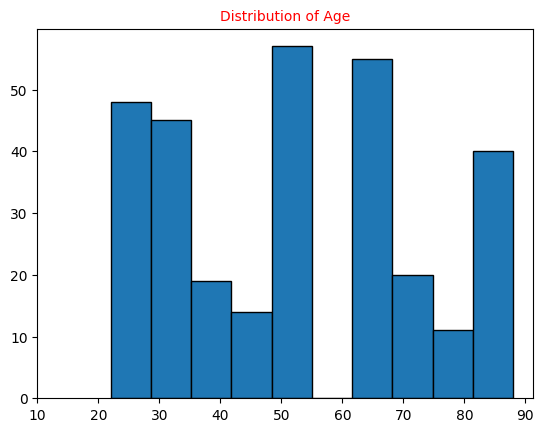

In [ ]:
# Fraud Vs Age
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.age, edgecolor='Black')
plt.xticks(np.arange(10, 100, step=10))
plt.show()

So, people in age group 50 to 60 tends to be slightly more victims of fraud.

In [ ]:
# Fraud Vs lat
lat_tran_total = fraud.sort_values('lat').groupby('lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

29.4400    100.000000
38.5294     72.222222
26.3304     64.705882
40.8095     50.000000
41.0233     47.826087
dtype: float64

As is evident from above stats, there are perticular latitudes codes that have 100% frauds.

In [ ]:
# Fraud Vs long
long_tran_total = fraud.sort_values('long').groupby('long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

-98.4590    100.000000
-82.6654     72.222222
-81.5871     64.705882
-72.8229     50.000000
-98.9041     47.826087
dtype: float64

In [ ]:
# Fraud Vs merch_lat
lat_tran_total = fraud.sort_values('merch_lat').groupby('merch_lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['merch_lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

25.568094    100.0
41.530432    100.0
41.763302    100.0
41.729858    100.0
41.700959    100.0
dtype: float64

In [ ]:
# Fraud Vs merch_long
long_tran_total = fraud.sort_values('merch_long').groupby('merch_long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['merch_long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

-166.550779    100.0
-79.057781     100.0
-78.598952     100.0
-78.609636     100.0
-78.638156     100.0
dtype: float64

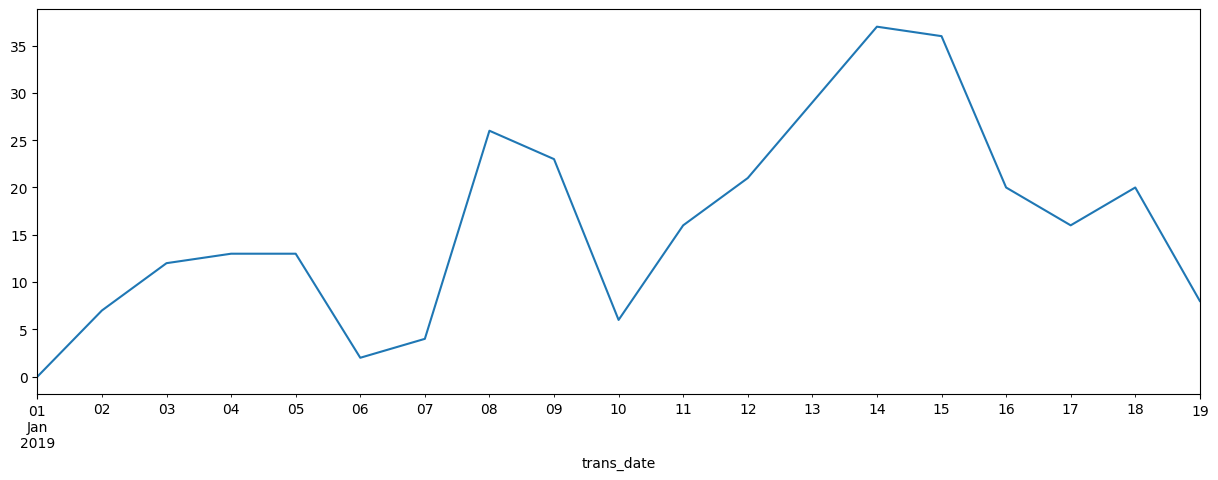

In [ ]:
# Fraud Vs trans_date
fraud['trans_date'] =  pd.to_datetime(fraud['trans_date'])
plt.figure(figsize=[15,5])
fraud.groupby(['trans_date'])['is_fraud'].sum().plot()
plt.show()

Now its time to change date and time to a format more acceptable for modelling. Before that, lets pull some stats required for Cost sheet.
Also, it may be noticed that the train data is for 1.5 years (full 2019 till mid of 2020) and test data is for last 6 months of 2020. This way we will be able to build model on 1.5 year of data and test it on future data and hence check model performance in future. We will do the Cost Benifit analysis on the entire data.

In [ ]:
# Total number of months
date_fraud = fraud.trans_date
date_fraud_test = pd.to_datetime(fraud_test.trans_date)
date_fraud = date_fraud.dt.to_period('M')
date_fraud_test = date_fraud_test.dt.to_period('M')
date = pd.concat([date_fraud, date_fraud_test])
print ('total number of records in file: ', date.size)

total number of records in file:  62275


In [ ]:
print ('Total number of months: ', date.value_counts().size)

Total number of months:  3


In [ ]:
print ('Average transactions per month: ', round(date.size/date.value_counts().size,0) )

Average transactions per month:  20758.0


In [ ]:
# Extracting fraud data
temp1 = fraud[['amt', 'is_fraud']]
temp2 = fraud_test[['amt', 'is_fraud']]
temp = pd.concat([temp1, temp2])
temp.shape

(62275, 2)

In [ ]:
# Average frauds per month
fraud_temp = temp[temp.is_fraud == 1]
print ('Average fraud transactions per month: ', round(fraud_temp.shape[0]/ date.value_counts().size,0))

Average fraud transactions per month:  148.0


In [ ]:
# Average amount per fraud transaction
print ('Average amount per fraud transaction: ', round(sum(fraud_temp.amt)/ fraud_temp.shape[0], 2))

Average amount per fraud transaction:  520.84


In [ ]:
# Average amount per fraud transaction
print ('max fraud amount : ' , max(fraud_temp.amt))

max fraud amount :  1334.07


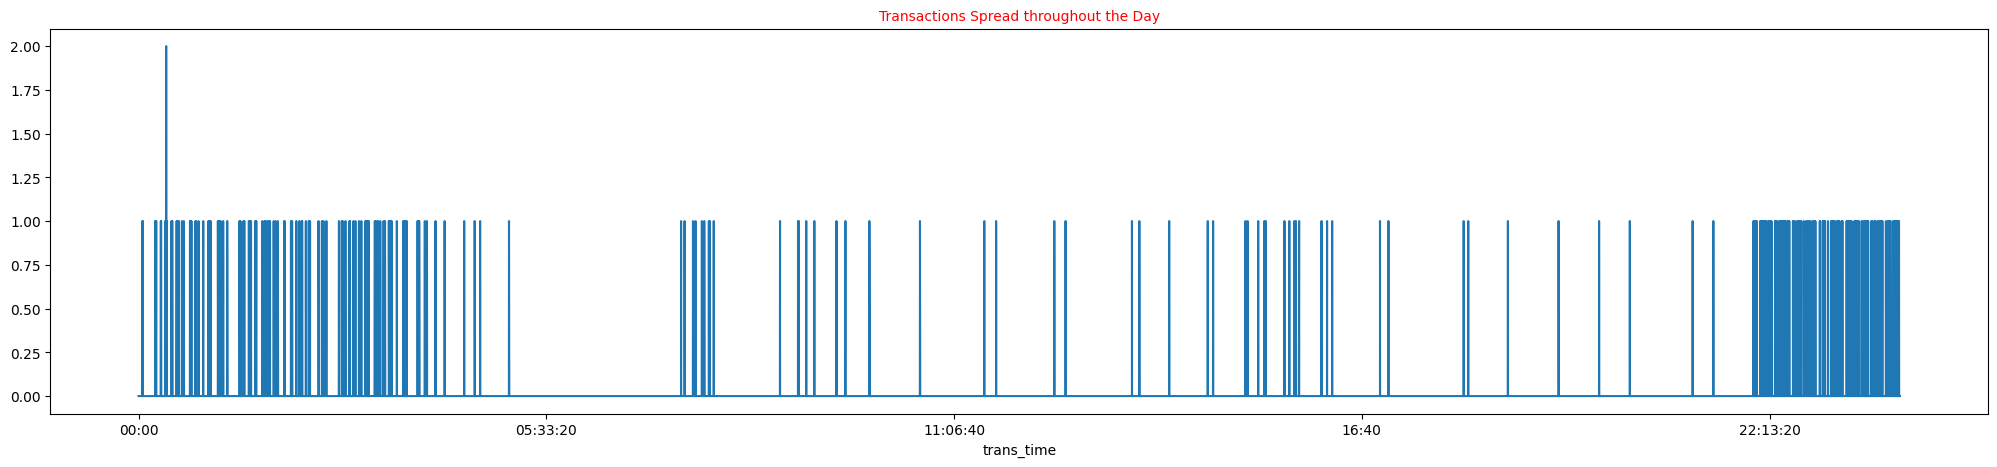

In [ ]:
# Fraud Vs trans_time
import datetime as dt
fraud.trans_date = fraud.trans_date.map(dt.datetime.toordinal)
plt.figure(figsize=[25,5])
plt.title('Transactions Spread throughout the Day', fontsize= 10, color = 'Red', fontweight = 100)
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

So, late nights and early mornings are the most prone time for frauds. Highest frequency of frauds is between 10 pm to 12 am. 12 am to 4:00 am also shows very high frequency of fraud transactions.

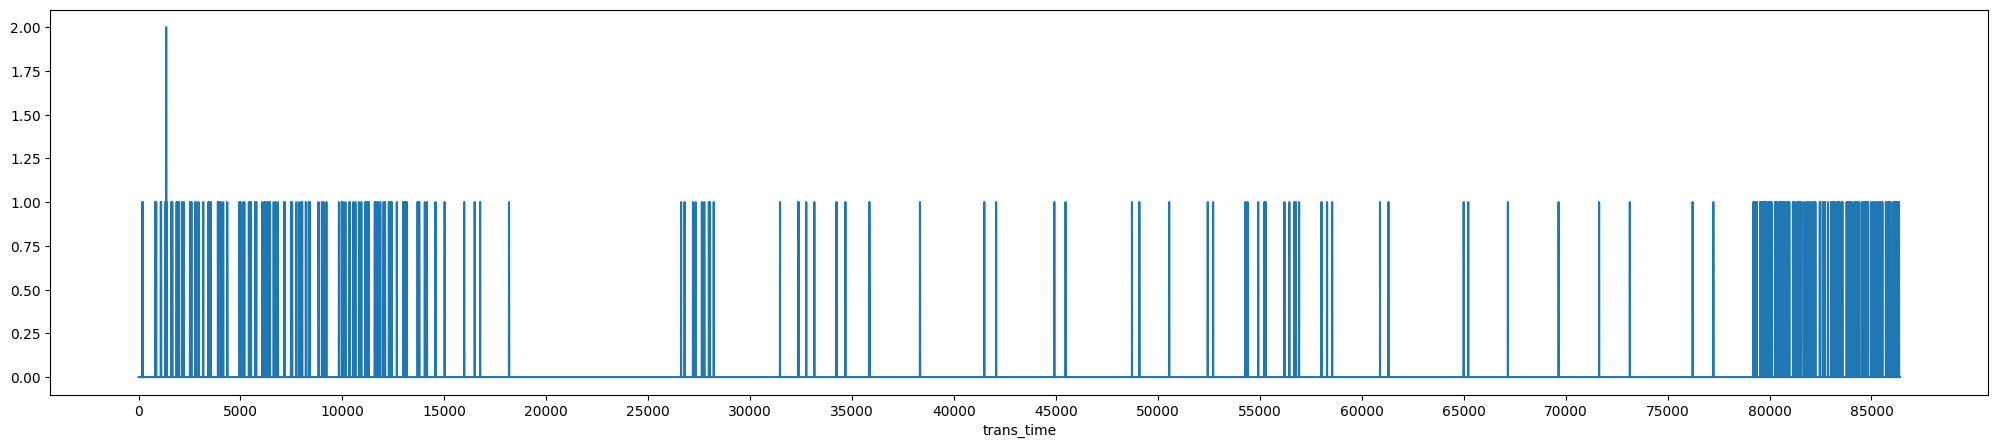

In [ ]:
# Converting trans_time into seconds & ploting the above graph again
fraud.trans_time = pd.to_datetime(fraud.trans_time,format='%H:%M:%S')
fraud.trans_time = 3600 * pd.DatetimeIndex(fraud.trans_time).hour + 60 * pd.DatetimeIndex(fraud.trans_time).minute + pd.DatetimeIndex(fraud.trans_time).second
plt.figure(figsize=[25,5])
plt.xticks(np.arange(0,90000,5000))
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

In [ ]:
# Similar data-time changes in test dataset
fraud_test['trans_date'] =  pd.to_datetime(fraud_test['trans_date'])
fraud_test.trans_date = fraud_test.trans_date.map(dt.datetime.toordinal)
fraud_test.trans_time = pd.to_datetime(fraud_test.trans_time,format='%H:%M:%S')
fraud_test.trans_time = 3600 * pd.DatetimeIndex(fraud_test.trans_time).hour + 60 * pd.DatetimeIndex(fraud_test.trans_time).minute + pd.DatetimeIndex(fraud_test.trans_time).second

In [ ]:
print ('train : ', fraud.shape)
print ('test : ', fraud_test.shape)

train :  (31151, 13)
test :  (31124, 13)


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31151 entries, 0 to 31150
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    31151 non-null  int64  
 1   category    31151 non-null  int64  
 2   amt         31151 non-null  float64
 3   lat         31150 non-null  float64
 4   long        31150 non-null  float64
 5   city_pop    31150 non-null  float64
 6   job         31151 non-null  int64  
 7   merch_lat   31150 non-null  float64
 8   merch_long  31150 non-null  float64
 9   is_fraud    31150 non-null  float64
 10  age         31151 non-null  int64  
 11  trans_date  31151 non-null  int64  
 12  trans_time  31151 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 3.1 MB


In [ ]:
fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31124 entries, 0 to 31123
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    31124 non-null  int64  
 1   category    31124 non-null  int64  
 2   amt         31123 non-null  float64
 3   lat         31123 non-null  float64
 4   long        31123 non-null  float64
 5   city_pop    31123 non-null  float64
 6   job         31124 non-null  int64  
 7   merch_lat   31123 non-null  float64
 8   merch_long  31123 non-null  float64
 9   is_fraud    31123 non-null  float64
 10  age         31124 non-null  int64  
 11  trans_date  31124 non-null  int64  
 12  trans_time  31124 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 3.1 MB


### Train Test Split
Splitting the data into train & validate datasets. The test dataset provided will be used for final evaluation.

In [ ]:
X = fraud.drop('is_fraud', axis=1)
X.head()

,merchant,category,amt,lat,long,city_pop,job,merch_lat,merch_long,age,trans_date,trans_time
0,514,8,4.97,36.0788,-81.1781,3495.0,356,36.011293,-82.048315,35,737060,18
1,241,4,107.23,48.8878,-118.2105,149.0,411,49.159047,-118.186462,45,737060,44
2,390,0,220.11,42.1808,-112.2620,4154.0,294,43.150704,-112.154481,61,737060,51
3,360,2,45.00,46.2306,-112.1138,1939.0,315,47.034331,-112.561071,56,737060,76
4,297,9,41.96,38.4207,-79.4629,99.0,110,38.674999,-78.632459,37,737060,186


In [ ]:
y = fraud['is_fraud']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: is_fraud, dtype: float64

In [ ]:
y = y.dropna()

In [ ]:
# Impute missing values in X:
X = X.fillna(X.mean())  # Replace with mean

# Align indices if necessary:
X = X.reindex(y.index)

In [ ]:
# Splitting the data into train and test such that ration of fraud is same in both
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y, random_state=100)

In [ ]:
# Inspecting the train and test datasets
print ('Train Dataset : ', X_train.shape)
print ('Test Dataset : ', X_test.shape)

Train Dataset :  (21805, 12)
Test Dataset :  (9345, 12)


In [ ]:
# Creating X_final & y_final from the test dataset provided by Kaggle. This will be used for final evaluation of the model
X_final = fraud_test.drop('is_fraud', axis=1)
y_final = fraud_test['is_fraud']


### Data Scaling

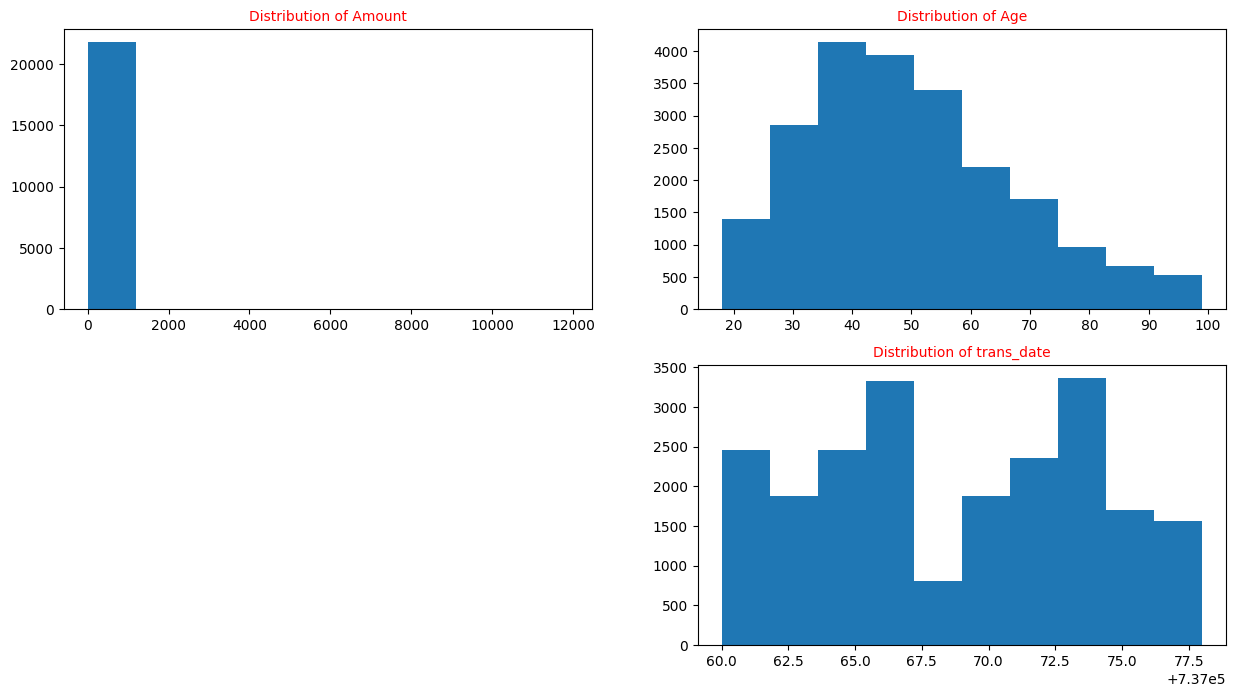

In [ ]:
# Check distribution of few variables
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Distribution of Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.amt)
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.age)
plt.subplot(2,2,4)
plt.title('Distribution of trans_date', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.trans_date)
plt.show()

In [ ]:
X_train.describe()

,merchant,category,amt,lat,long,city_pop,job,merch_lat,merch_long,age,trans_date,trans_time
count,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,2.180500e+04,21805.000000,21805.000000,21805.000000,21805.00000,21805.000000,21805.000000
mean,343.878101,6.220729,73.228759,38.544628,-90.305715,8.780353e+04,240.894611,38.537539,-90.306776,49.87723,737068.670764,47662.465031
std,200.516603,3.912737,159.286711,5.087948,13.901007,2.921461e+05,135.706115,5.116432,13.919827,17.28365,5.253400,24498.790816
min,0.000000,0.000000,1.000000,20.027100,-165.672300,2.300000e+01,0.000000,19.040141,-166.596324,18.00000,737060.000000,0.000000
25%,166.000000,3.000000,9.850000,34.668900,-96.962300,7.440000e+02,124.000000,34.745988,-97.041221,36.00000,737065.000000,27209.000000
50%,349.000000,6.000000,48.490000,39.354300,-87.591700,2.501000e+03,239.000000,39.351195,-87.500177,48.00000,737068.000000,50647.000000
75%,513.000000,10.000000,84.250000,41.940400,-80.158000,2.047800e+04,360.000000,41.945139,-80.239521,61.00000,737073.000000,68453.000000
max,692.000000,13.000000,11872.210000,65.689900,-67.950300,2.906700e+06,474.000000,66.416444,-66.967742,99.00000,737078.000000,86394.000000


In [ ]:
# Identify the variables to be scaled
vars_to_scale = ['merchant', 'category', 'amt', 'lat', 'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'age', 'trans_date', 'trans_time']

In [ ]:
# Lets try various scalers available in Scikit library. At optimum time, will finalize one.
# Based on various test results, QuantileTransformer with Gaussian distribution seems best suited.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
#scaler = MinMaxScaler()
#scaler = StandardScaler()
#scaler = PowerTransformer()
scaler = QuantileTransformer(output_distribution='normal')
#scaler = RobustScaler()

In [ ]:
# Scaling
X_train[vars_to_scale] = scaler.fit_transform(X_train[vars_to_scale])
X_test[vars_to_scale] = scaler.transform(X_test[vars_to_scale])
X_final[vars_to_scale] = scaler.transform(X_final[vars_to_scale])
X_train.describe()

,merchant,category,amt,lat,long,city_pop,job,merch_lat,merch_long,age,trans_date,trans_time
count,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000
mean,0.003768,-0.153228,0.007991,-0.006264,-0.004924,0.002006,0.007682,-0.016636,0.005367,0.005728,-0.175157,0.003345
std,1.035866,1.816371,0.996210,1.014242,1.024076,1.024425,1.000286,1.004179,1.001120,1.043777,1.827850,0.998210
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.676854,-0.627196,-0.658043,-0.695908,-0.675277,-0.660376,-0.662724,-0.686047,-0.667198,-0.713599,-0.595437,-0.667265
50%,0.001255,-0.021329,0.004136,0.003764,0.000000,-0.001255,0.003764,-0.021813,-0.001121,0.030114,-0.042668,0.001051
75%,0.687939,0.733156,0.682854,0.676854,0.678433,0.675277,0.684763,0.657514,0.683666,0.703922,0.636387,0.673077
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


In [ ]:
# Inspection after scaling
X_test.describe()

,merchant,category,amt,lat,long,city_pop,job,merch_lat,merch_long,age,trans_date,trans_time
count,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000
mean,-0.010295,-0.150495,-0.015618,-0.016985,0.009980,0.006345,0.024733,-0.020906,0.019268,-0.007536,-0.188643,-0.002435
std,1.026110,1.817190,0.988070,1.018813,1.025990,1.046273,1.002258,1.007330,0.999102,1.047018,1.869790,0.999018
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-3.557871,-5.199338,-5.199338,-5.199338,-3.347760
25%,-0.676854,-0.627196,-0.690488,-0.692715,-0.654930,-0.660376,-0.651824,-0.670450,-0.643811,-0.713599,-0.595437,-0.674798
50%,-0.013801,-0.021329,-0.019096,-0.003764,0.021329,-0.006273,0.025094,-0.027249,0.018732,0.030114,0.057742,-0.000115
75%,0.678433,0.733156,0.663304,0.648724,0.702315,0.686350,0.707140,0.635800,0.712110,0.703922,0.636387,0.676262
max,5.199338,5.199338,3.248082,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,2.806711,5.199338,5.199338


In [ ]:
# Inspection after scaling
X_final.describe()

,merchant,category,amt,lat,long,city_pop,job,merch_lat,merch_long,age,trans_date,trans_time
count,31124.000000,31124.000000,31123.000000,31123.000000,31123.000000,31123.000000,31124.000000,31123.000000,31123.000000,31124.000000,3.112400e+04,31124.000000
mean,0.007131,-0.126145,-0.015098,-0.005046,0.008244,0.001708,0.001336,-0.014500,0.016769,-0.028315,5.199338e+00,0.034438
std,1.042831,1.837949,0.982887,1.010402,1.008044,1.039515,0.989166,1.005940,0.984989,1.065190,8.881927e-16,0.987653
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-3.762616,-4.194759,-5.199338,5.199338e+00,-5.199338
25%,-0.676854,-0.627196,-0.678748,-0.695908,-0.651824,-0.653377,-0.670557,-0.684904,-0.641666,-0.713599,5.199338e+00,-0.628176
50%,-0.006273,-0.021329,-0.031851,0.008782,0.012546,-0.008603,-0.005018,-0.015263,0.009481,-0.038901,5.199338e+00,0.040766
75%,0.715218,0.733156,0.659806,0.687939,0.683178,0.675277,0.675277,0.668322,0.688370,0.662724,5.199338e+00,0.691261
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338e+00,5.199338


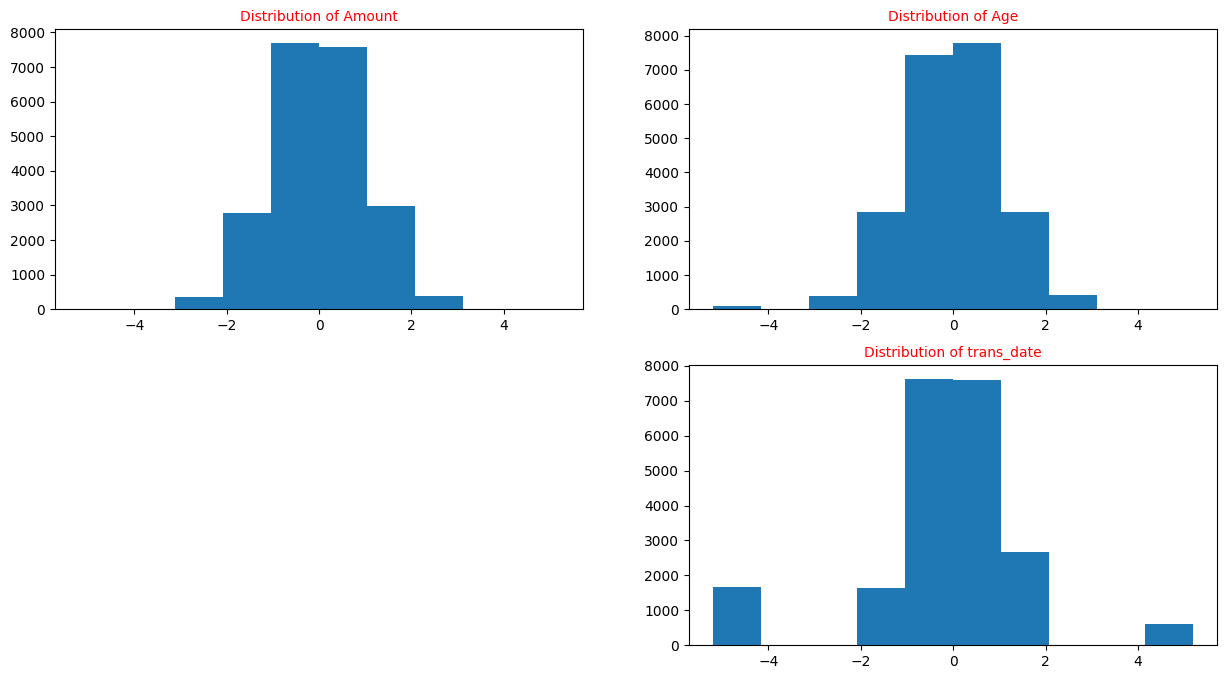

In [ ]:
# Lets check the distribution after scaling
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Distribution of Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.amt)
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.age)
plt.subplot(2,2,4)
plt.title('Distribution of trans_date', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.trans_date)
plt.show()

Quite evident that post scaling Skewness in data has been handles and date is more normally distributed.

### Logistic Regression Model
Lets start with a Basic Logistic Regression Model and check its Stats.

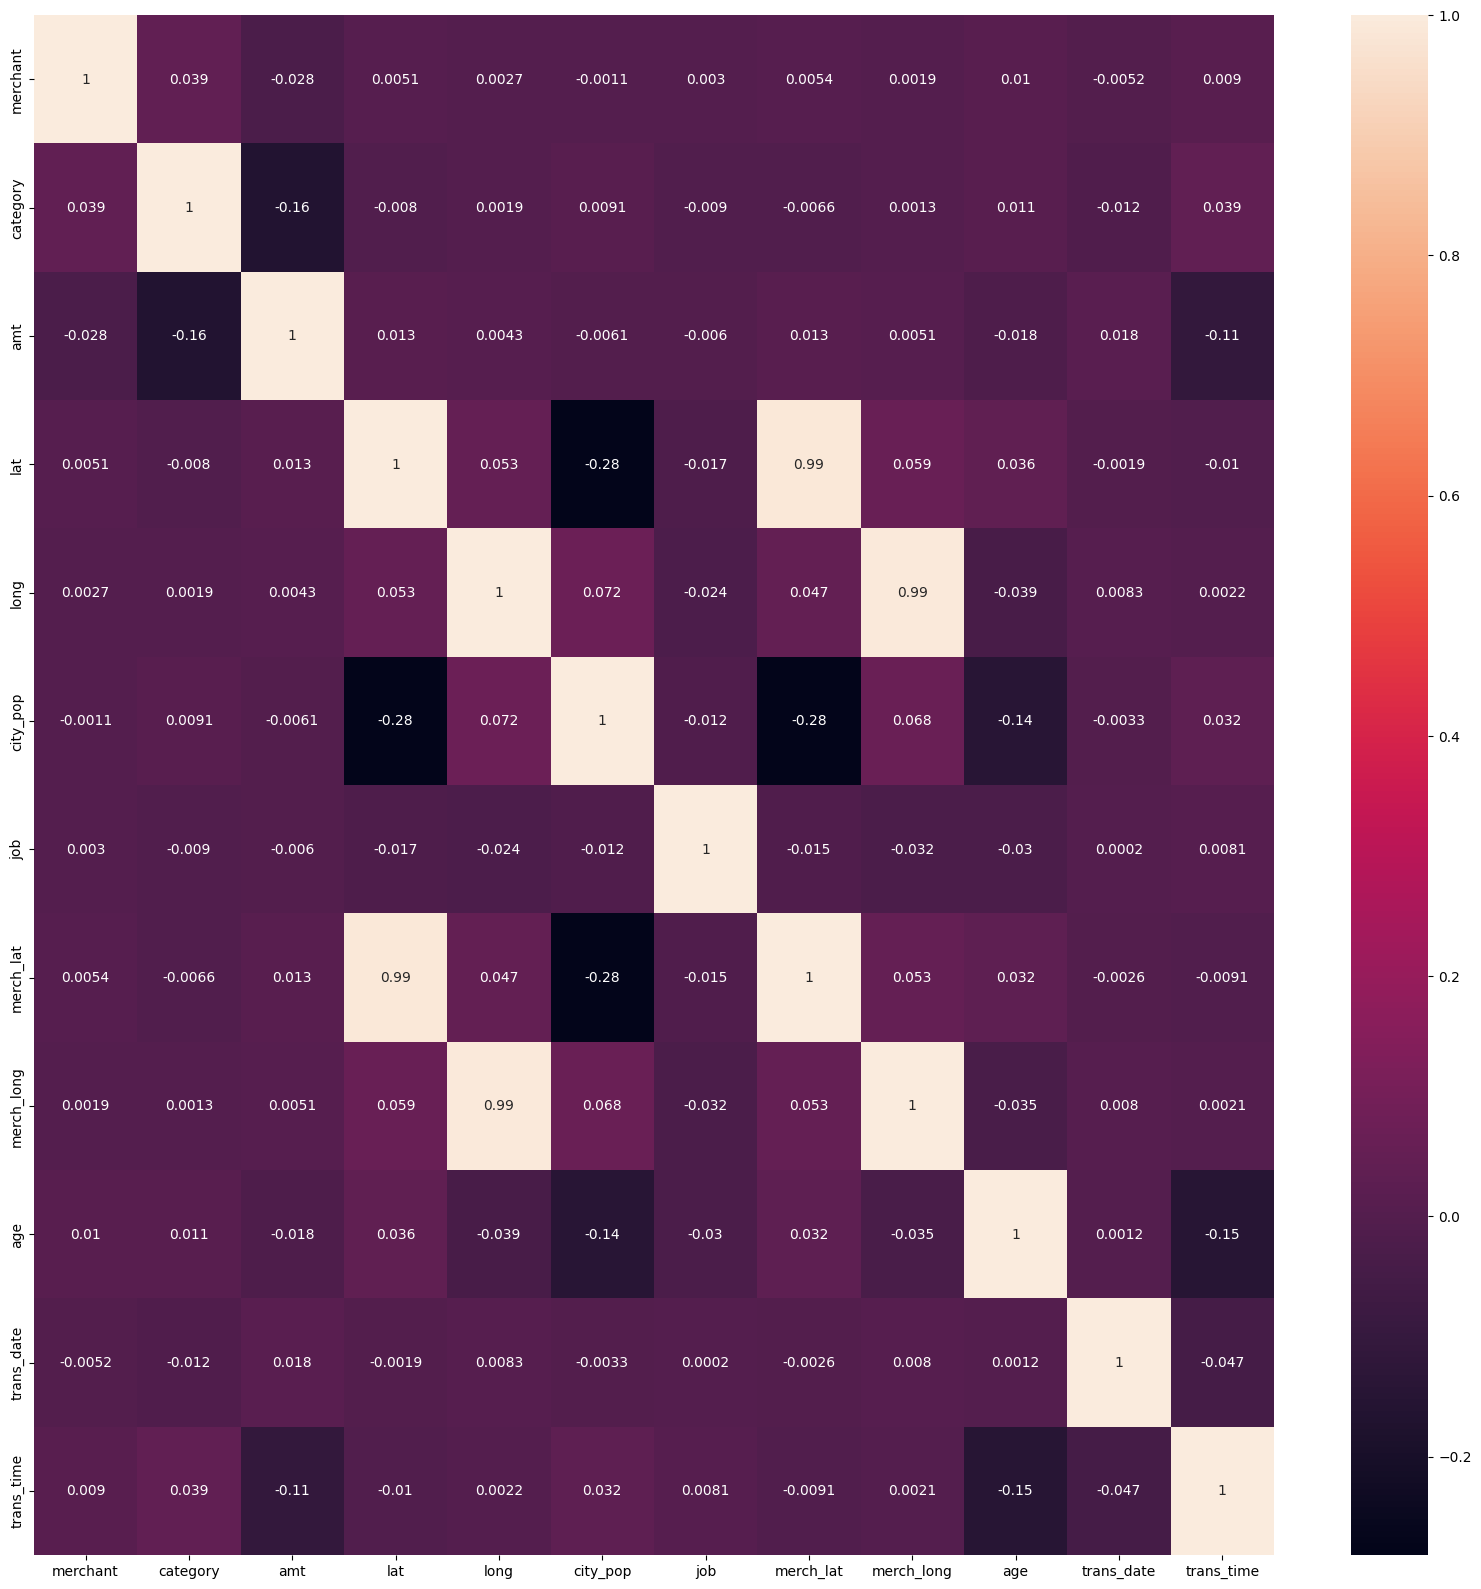

In [ ]:
# Let's examine any correlation in variables and remove variables with high correlation
plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [ ]:
# There is high correlation between variables long, merch_long and zip. Similarly merch_lat has high correlation with lat.
# This correlation will impact Linear Regression model but will be fine for other models. Hence, creating a different train & test dataframe for LR after dropping 'long', 'merch_long', 'merch_lat'.
X_train_lr = X_train.drop(['long', 'merch_long', 'merch_lat'], axis=1)
X_test_lr = X_test.drop(['long', 'merch_long', 'merch_lat'], axis=1)
X_final_lr = X_final.drop(['long', 'merch_long', 'merch_lat'], axis=1)
X_train_lr.head()

,merchant,category,amt,lat,city_pop,job,age,trans_date,trans_time
5787,1.109378,-0.021329,-0.336228,-0.288750,-1.088723,-1.152175,0.478025,-0.955471,0.556803
5437,0.724973,0.539431,-1.206239,-0.325577,1.566990,-0.124523,-0.627196,-0.955471,-0.063571
1632,-0.483658,-0.021329,0.637978,-0.043924,-1.545927,-0.354822,0.092972,-5.199338,0.464524
11275,0.217488,-0.227777,0.567495,-1.040090,-0.530745,0.471004,1.084195,-0.381675,0.434738
15855,-0.336178,0.539431,-0.687187,0.148584,-0.951518,0.047692,0.805692,0.057742,-0.648271


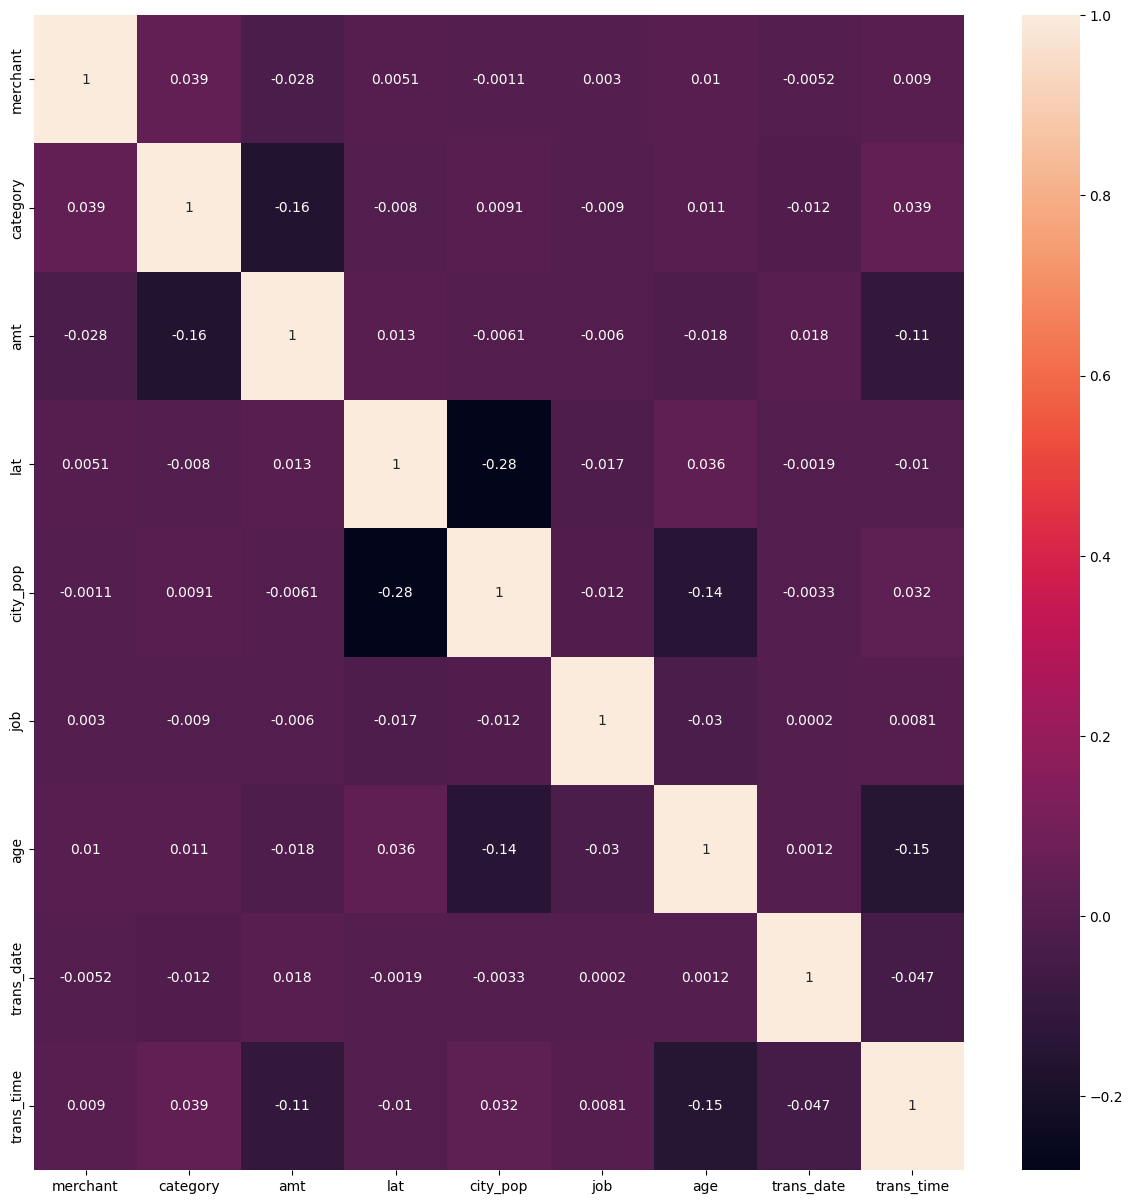

In [ ]:
# Let's examine the correlation in variables again
plt.figure(figsize = (15,15))
sns.heatmap(X_train_lr.corr(), annot=True)
plt.show()

In [ ]:
# Inspecting the dataset
print(X_train_lr.shape)
print(X_test_lr.shape)
print(X_final_lr.shape)

(21805, 9)
(9345, 9)
(31124, 9)


In [ ]:
# Function to draw ROC curve
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Function to return various standard metrices for a model
def model_metrics(a, p):
  confusion = confusion_matrix(a, p)
  TP = confusion[1,1] # true positive
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives
  print ('Accuracy    : ', metrics.accuracy_score(a, p ))
  print ('Sensitivity : ', TP / float(TP+FN))
  print ('Specificity : ', TN / float(TN+FP))
  print ('Pricision   : ', TP / float(TP + FP))
  print ('Recall      : ', TP / float(TP + FN))
  print(confusion)

  return None

In [ ]:
# Function to calculate the train-test stats including cost of a model as cost is one of the factors to pick the final model
# Monthly cost of the model. Pass the classifier name here. Also pass 0 & 1
# 0 will print the model metrices with 1 will pass all the metrices to the calling routine

def cost_train_test(classifier, p):
  y_train_pred = classifier.predict(X_train)
  y_test_pred = classifier.predict(X_test)
  y_final_pred = classifier.predict(X_final)
  roc1 = metrics.roc_auc_score( y_train, y_train_pred)
  roc2 = metrics.roc_auc_score( y_test, y_test_pred)
  roc3 = metrics.roc_auc_score( y_final, y_final_pred)
  cm1 = confusion_matrix(y_train, y_train_pred)     # cm1 is confusion matrix of model on imbalanced train dataset
  cm2 = confusion_matrix(y_test, y_test_pred)       # cm2 is confusion matrix of model on test dataset
  cm3 = 0
  cm = cm1 + cm2 + cm3
  TP = cm[1,1] # true positive
  TN = cm[0,0] # true negatives
  FP = cm[0,1] # false positives
  FN = cm[1,0] # false negatives
  tfpm = round((TP + FP)/ 24, 0)
  c1 = 1.5 * tfpm
  c2 = round (530.66 * round(FN/24,0), 2)
  c3 = round (c1 + c2, 2)
  if p == 0:
    print(cm)
    print ('Average number of transactions per month detected as fraudulent by the model: ', tfpm)
    print ('Total cost of providing customer support per month for fraudulent transactions detected by the model: ', c1)
    print ('Average number of transactions per month that are fraudulent but not detected by the model: ', round(FN/24,0))
    print ('Cost incurred due to fraudulent transactions left undetected by the model: ', c2)
    print ('Cost incurred per month after the model is built and deployed: ', c3)
    return None

  else:
    print(cm)
    acc = (TP + TN)/ float(TP + TN + FP + FN)
    sen = TP / float(TP+FN)
    spe = TN / float(TN+FP)
    pre =  TP / float(TP + FP)
    rec =  TP / float(TP + FN)
    return (FP, FN, TP, c3, acc, sen, spe, pre, rec, roc1, roc2, roc3)

In [ ]:
# Function to calculate the overall stats including cost of a model as cost is one of the factors to pick the final model
# Monthly cost of the model. Pass the classifier name here. Also pass 0 & 1
# 0 will print the model metrices with 1 will pass all the metrices to the calling routine

def cost(classifier, p):
  y_train_pred = classifier.predict(X_train)
  y_test_pred = classifier.predict(X_test)
  y_final_pred = classifier.predict(X_final)
  roc1 = metrics.roc_auc_score( y_train, y_train_pred)
  roc2 = metrics.roc_auc_score( y_test, y_test_pred)
  roc3 = metrics.roc_auc_score( y_final, y_final_pred)
  cm1 = confusion_matrix(y_train, y_train_pred)     # cm1 is confusion matrix of model on imbalanced train dataset
  cm2 = confusion_matrix(y_test, y_test_pred)       # cm2 is confusion matrix of model on test dataset
  cm3 = confusion_matrix(y_final, y_final_pred)     # cm3 is confusion matrix of model on final dataset
  cm = cm1 + cm2 + cm3
  TP = cm[1,1] # true positive
  TN = cm[0,0] # true negatives
  FP = cm[0,1] # false positives
  FN = cm[1,0] # false negatives
  tfpm = round((TP + FP)/ 24, 0)
  c1 = 1.5 * tfpm
  c2 = round (530.66 * round(FN/24,0), 2)
  c3 = round (c1 + c2, 2)
  if p == 0:
    print(cm)
    print ('Average number of transactions per month detected as fraudulent by the model: ', tfpm)
    print ('Total cost of providing customer support per month for fraudulent transactions detected by the model: ', c1)
    print ('Average number of transactions per month that are fraudulent but not detected by the model: ', round(FN/24,0))
    print ('Cost incurred due to fraudulent transactions left undetected by the model: ', c2)
    print ('Cost incurred per month after the model is built and deployed: ', c3)
    return None

  else:
    print(cm)
    acc = (TP + TN)/ float(TP + TN + FP + FN)
    sen = TP / float(TP+FN)
    spe = TN / float(TN+FP)
    pre =  TP / float(TP + FP)
    rec =  TP / float(TP + FN)
    return (FP, FN, TP, c3, acc, sen, spe, pre, rec, roc1, roc2, roc3)

In [ ]:
# Logistic regression model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_lr)
lr_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lr = lr_model.fit()

In [ ]:
# Threshold of 0.5 is arbitrarily taken. Since, this is just a base model, we will evaluate threshold at a later stage.
y_train_pred = lr.predict(X_train_sm)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)

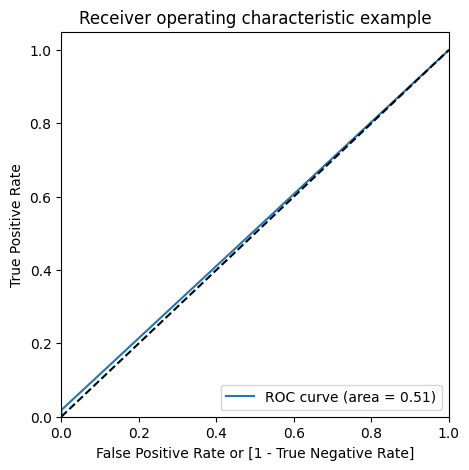

AUC for the LR Model 0.5090276598336259
Accuracy    :  0.9898188488878698
Sensitivity :  0.018518518518518517
Specificity :  0.9995368011487331
Pricision   :  0.2857142857142857
Recall      :  0.018518518518518517
[[21579    10]
 [  212     4]]


In [ ]:
draw_roc(y_train, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

In [ ]:
# Address imbalance using under sampling
from imblearn import under_sampling
us = under_sampling.RandomUnderSampler(random_state=100)
X_train_us, y_train_us = us.fit_resample(X_train_lr, y_train)
print (X_train_us.shape)
print (y_train_us.shape)
print (y_train_us.value_counts())

(432, 9)
(432,)
0.0    216
1.0    216
Name: is_fraud, dtype: int64


In [ ]:
# Logistic Regression Model
X_train_us = sm.add_constant(X_train_us)
lr_model = sm.GLM(y_train_us ,X_train_us, family = sm.families.Binomial())
lr_us = lr_model.fit()

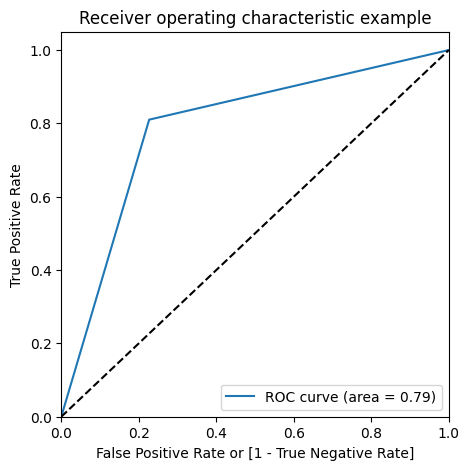

AUC for the LR Model 0.7916666666666666
Accuracy    :  0.7916666666666666
Sensitivity :  0.8101851851851852
Specificity :  0.7731481481481481
Pricision   :  0.78125
Recall      :  0.8101851851851852
[[167  49]
 [ 41 175]]


In [ ]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_us.predict(X_train_us)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_us, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

In [ ]:
# Address imbalance using over sampling
from imblearn import over_sampling
ro = over_sampling.RandomOverSampler(random_state=100)
X_train_ro, y_train_ro = ro.fit_resample(X_train_lr, y_train)
print (X_train_ro.shape)
print (y_train_ro.shape)
print (y_train_ro.value_counts())

(43178, 9)
(43178,)
0.0    21589
1.0    21589
Name: is_fraud, dtype: int64


In [ ]:
# Logistic Regression Model
X_train_ro = sm.add_constant(X_train_ro)
lr_model = sm.GLM(y_train_ro ,X_train_ro, family = sm.families.Binomial())
lr_ro = lr_model.fit()

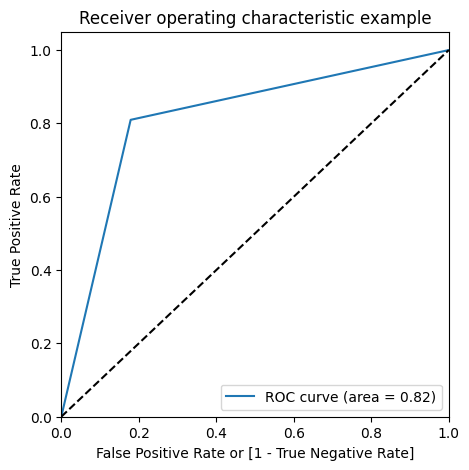

AUC for the LR Model 0.8153226179999074
Accuracy    :  0.8153226179999074
Sensitivity :  0.8097179118995785
Specificity :  0.8209273241002363
Pricision   :  0.8188972689370871
Recall      :  0.8097179118995785
[[17723  3866]
 [ 4108 17481]]


In [ ]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_ro.predict(X_train_ro)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_ro, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Address imbalance using ADASYN
ada = over_sampling.ADASYN(random_state=100)
X_train_ada, y_train_ada = ada.fit_resample(X_train_lr, y_train)
print (X_train_ada.shape)
print (y_train_ada.shape)
print (y_train_ada.value_counts())

(43194, 9)
(43194,)
1.0    21605
0.0    21589
Name: is_fraud, dtype: int64


In [ ]:
# Logistic Regression Model
X_train_ada = sm.add_constant(X_train_ada)
lr_model = sm.GLM(y_train_ada ,X_train_ada, family = sm.families.Binomial())
lr_ada = lr_model.fit()

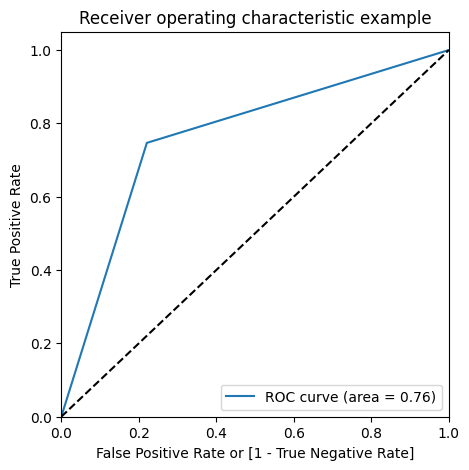

AUC for the LR Model 0.7630054697663378
Accuracy    :  0.7629994906700005
Sensitivity :  0.7468641518167091
Specificity :  0.7791467877159665
Pricision   :  0.7719096823574435
Recall      :  0.7468641518167091
[[16821  4768]
 [ 5469 16136]]


In [ ]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_ada.predict(X_train_ada)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_ada, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

In [ ]:
# Address imbalance using SMOTE
from imblearn import over_sampling
smte = over_sampling.SMOTE(random_state=100)
X_train_smte, y_train_smte = smte.fit_resample(X_train_lr, y_train)
print (X_train_smte.shape)
print (y_train_smte.shape)
print (y_train_smte.value_counts())

(43178, 9)
(43178,)
0.0    21589
1.0    21589
Name: is_fraud, dtype: int64


In [ ]:
# Logistic Regression Model
X_train_smte = sm.add_constant(X_train_smte)
lr_model = sm.GLM(y_train_smte ,X_train_smte, family = sm.families.Binomial())
lr_smte = lr_model.fit()
X_train_smte.shape

(43178, 10)

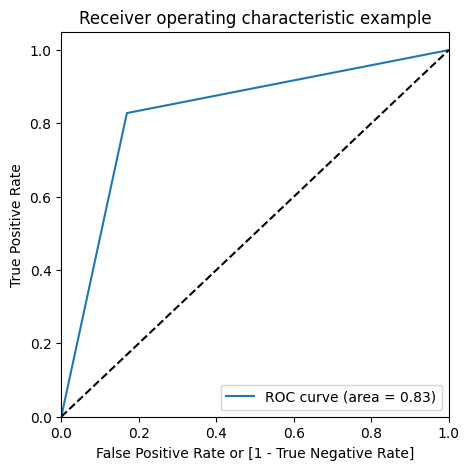

AUC for the LR Model 0.8294038630784196
Accuracy    :  0.8294038630784195
Sensitivity :  0.8281532261799991
Specificity :  0.83065449997684
Pricision   :  0.8302298583700952
Recall      :  0.8281532261799991
[[17933  3656]
 [ 3710 17879]]


In [ ]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_smte.predict(X_train_smte)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_smte, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

Based on the train mertices the model created on the SMOTE and Over Sampled data is slightly better than the rest. Lets evaluate the model created on SMOTE.

In [ ]:
# Summary of LR model created on data cured for imbalance using SMOTE
lr_smte.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:                43178
Model:                            GLM   Df Residuals:                    43168
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17888.
Date:                Mon, 25 Dec 2023   Deviance:                       35776.
Time:                        19:01:23   Pearson chi2:                 4.28e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4275
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4046      0.019    -74.756      0.000      -1.441      -1.368
merchant      -0.1275      0.014     -9.072      0.000      -0.155      -0.100
category       0.0304      0.009      3.390      0.001       0.013       0.048
amt            1.3585      0.012    110.699      0.000       1.334       1.383
lat            0.2918      0.015     19.493      0.000       0.262       0.321
city_pop      -0.0488      0.015     -3.330      0.001      -0.078      -0.020
job            0.2288      0.015     15.289      0.000       0.199       0.258
age            0.3050      0.013     23.865      0.000       0.280       0.330
trans_date     0.3301      0.010     32.106      0.000       0.310       0.350
trans_time    -0.0046      0.011     -0.432      0.666      -0.026       0.016
==============================================================================
"""

In [ ]:
# Check the VIF of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_smte.columns
vif['VIF'] = [variance_inflation_factor(X_train_smte.values, i) for i in range(X_train_smte.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
0,const,1.44
4,lat,1.38
5,city_pop,1.30
6,job,1.12
3,amt,1.06


VIF of all the variables is under 5 and hence no major correlation among variables. Also, the P value of all variables is low. Hence, we can consider this as a final model.

In [ ]:
# Getting the predicted values on the train set
y_train_pred = lr_smte.predict(X_train_smte)

In [ ]:
# Lets have a dataset with only the index, is_fraud and predicted is_fraud fields
lr_fraud_final = pd.DataFrame({'Fraud Index': y_train_smte.index, 'is_fraud':y_train_smte.values, 'is_fraud_Prob':y_train_pred})
lr_fraud_final.reset_index(drop=True, inplace=True)
lr_fraud_final.head()

,Fraud Index,is_fraud,is_fraud_Prob
0,0,0.0,0.077971
1,1,0.0,0.021342
2,2,0.0,0.101078
3,3,0.0,0.346282
4,4,0.0,0.128940


In [ ]:
# To find the optimum cutoff, let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lr_fraud_final[i]= lr_fraud_final.is_fraud_Prob.map(lambda x: 1 if x > i else 0)
lr_fraud_final.head()

,Fraud Index,is_fraud,is_fraud_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.0,0.077971,1,0,0,0,0,0,0,0,0,0
1,1,0.0,0.021342,1,0,0,0,0,0,0,0,0,0
2,2,0.0,0.101078,1,1,0,0,0,0,0,0,0,0
3,3,0.0,0.346282,1,1,1,1,0,0,0,0,0,0
4,4,0.0,0.128940,1,1,0,0,0,0,0,0,0,0


In [ ]:
# Printing confusion matrix at various cutoff
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sens','spec', 'prec', 'recall'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(lr_fraud_final.is_fraud, lr_fraud_final[i] )
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    accuracy = (TN + TP)/ (TN + TP + FP + FN)
    sens = TP/ (FN + TP)
    spec = TN/ (TN + FP)
    prec = TP/ (TP + FP)
    recall = TP/ (TP + FN)
    cutoff_df.loc[i] =[ i ,accuracy,sens,spec, prec, recall]
print(cutoff_df)

     prob  accuracy      sens      spec      prec    recall
0.0   0.0  0.500000  1.000000  0.000000  0.500000  1.000000
0.1   0.1  0.643870  0.972671  0.315068  0.586794  0.972671
0.2   0.2  0.699731  0.881931  0.517532  0.646388  0.881931
0.3   0.3  0.746700  0.839316  0.654083  0.708144  0.839316
0.4   0.4  0.794525  0.832507  0.756543  0.773731  0.832507
0.5   0.5  0.829404  0.828153  0.830654  0.830230  0.828153
0.6   0.6  0.849020  0.807402  0.890639  0.880709  0.807402
0.7   0.7  0.851637  0.764741  0.938534  0.925604  0.764741
0.8   0.8  0.813771  0.655982  0.971560  0.958446  0.655982
0.9   0.9  0.676108  0.359581  0.992635  0.979929  0.359581


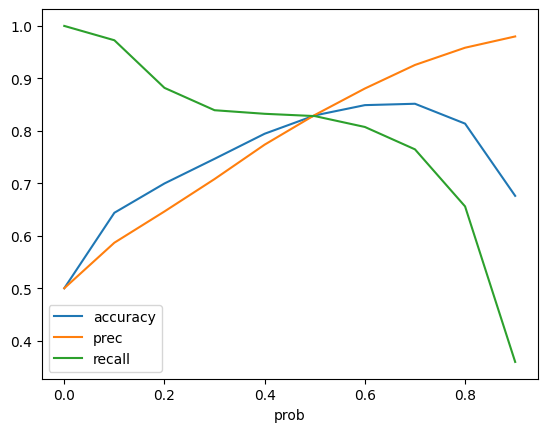

In [ ]:
# Let's plot accuracy precision and recall for various probabilities.
# Recall ensures we have good TP while precision keeps a check on FN
cutoff_df.plot.line(x='prob', y=['accuracy','prec','recall'])
plt.show()

In [ ]:
# Turn-out that 0.5 is optimum cut-off. Let's pull the stats for train & test datasets
y_train_pred = lr_smte.predict(X_train_smte)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
X_test_lr = sm.add_constant(X_test_lr)
y_test_pred = lr_smte.predict(X_test_lr)
y_test_pred = y_test_pred.map(lambda x: 1 if x > 0.5 else 0)

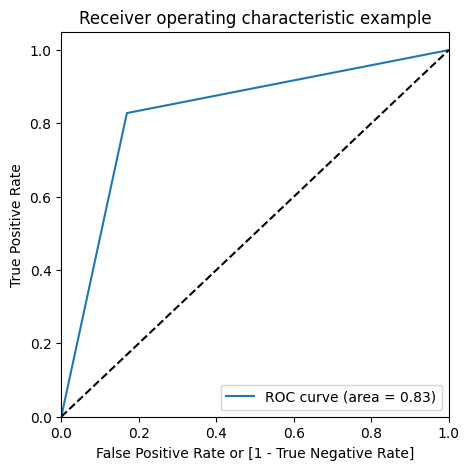

AUC for the LR Model 0.8294038630784196
Accuracy    :  0.8294038630784195
Sensitivity :  0.8281532261799991
Specificity :  0.83065449997684
Pricision   :  0.8302298583700952
Recall      :  0.8281532261799991
[[17933  3656]
 [ 3710 17879]]


In [ ]:
# Model Metrices on training dataset
draw_roc(y_train_smte, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

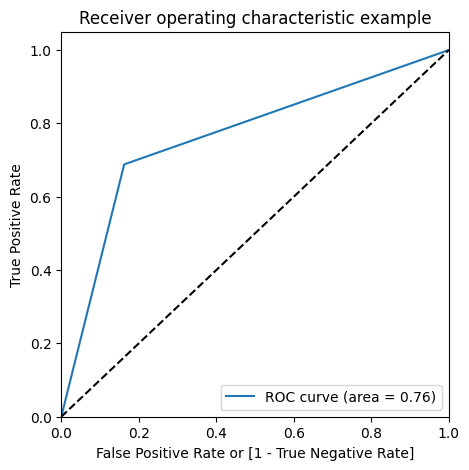

AUC for the LR Model 0.7629143829407417
Accuracy    :  0.8361690743713216
Sensitivity :  0.6881720430107527
Specificity :  0.8376567228707307
Pricision   :  0.04086845466155811
Recall      :  0.6881720430107527
[[7750 1502]
 [  29   64]]


In [ ]:
# Model Metrices on test dataset
draw_roc(y_test, y_test_pred)
print ('AUC for the LR Model', metrics.roc_auc_score(y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

So the basic Regression model has a moderate AUC, Accuracy & Recall but a very low Precision.

### Descision Tree
Lets create a decision tree with all default parameters with Tree Depth set to 10 to control the size of tree for SMOTE and ADASYN train datasets. But before that, lets create dataset for various imbalances techinques that we will be using going forward.
Since Decision Trees, XGBOOST & Random Forest are not impacted by correlations among the variables. We will restore the dataset to all the final variables that were scaled.
It was noticed that the models build on the dataset with reduced columns were less effective overall.

In [ ]:
X_train.shape

(21805, 12)

In [ ]:
# Dataset for Under Sampling
us = under_sampling.RandomUnderSampler(random_state=100)
X_train_us, y_train_us = us.fit_resample(X_train, y_train)
print (X_train_us.shape)
print (y_train_us.shape)
print (y_train_us.value_counts())

(432, 12)
(432,)
0.0    216
1.0    216
Name: is_fraud, dtype: int64


In [ ]:
# Dataset for Over Sampling
ro = over_sampling.RandomOverSampler(random_state=100)
X_train_ro, y_train_ro = ro.fit_resample(X_train, y_train)
print (X_train_ro.shape)
print (y_train_ro.shape)
print (y_train_ro.value_counts())

(43178, 12)
(43178,)
0.0    21589
1.0    21589
Name: is_fraud, dtype: int64


In [ ]:
# Dataset for SMOTE
smte = over_sampling.SMOTE(random_state=100)
X_train_smte, y_train_smte = smte.fit_resample(X_train, y_train)
print (X_train_smte.shape)
print (y_train_smte.shape)
print (y_train_smte.value_counts())

(43178, 12)
(43178,)
0.0    21589
1.0    21589
Name: is_fraud, dtype: int64


In [ ]:
# Dataset for ADASYN
ada = over_sampling.ADASYN(random_state=100)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
print (X_train_ada.shape)
print (y_train_ada.shape)
print (y_train_ada.value_counts())

(43201, 12)
(43201,)
1.0    21612
0.0    21589
Name: is_fraud, dtype: int64


In [ ]:
# Function to create Decision Tree image
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
#import pydotplus

# function to print the decision graph
#def get_dt_graph(dt_classifier):
#    dot_data = StringIO()
#    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
#                    feature_names=X.columns,
#                    class_names=['Fraud', "Not Fraud"])
#    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#    return graph

In [ ]:
# Decision Tree Model with default parameters and under sampled train data
from sklearn.tree import DecisionTreeClassifier
dt_us = DecisionTreeClassifier(max_depth=10)
dt_us.fit(X_train_us, y_train_us)
y_train_pred = dt_us.predict(X_train_us)
y_test_pred = dt_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

AUC         :  1.0
Accuracy    :  1.0
Sensitivity :  1.0
Specificity :  1.0
Pricision   :  1.0
Recall      :  1.0
[[216   0]
 [  0 216]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9529853165964148
Accuracy    :  0.9069020866773676
Sensitivity :  1.0
Specificity :  0.9059706331928297
Pricision   :  0.09617097061442564
Recall      :  1.0
[[19559  2030]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8425118195891386
Accuracy    :  0.909470304975923
Sensitivity :  0.7741935483870968
Specificity :  0.9108300907911803
Pricision   :  0.0802675585284281
Recall      :  0.7741935483870968
[[8427  825]
 [  21   72]]


In [ ]:
# Decision Graph for the above model
#gph = get_dt_graph(dt_us)
#Image(gph.create_png())

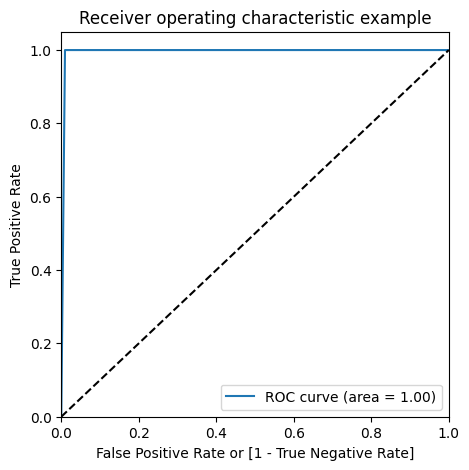

AUC         :  0.9952058918893881
Accuracy    :  0.9952058918893881
Sensitivity :  1.0
Specificity :  0.9904117837787763
Pricision   :  0.9905028445586346
Recall      :  1.0
[[21382   207]
 [    0 21589]]


In [ ]:
# Decision Tree Model with default parameters and over sampled train data
dt_ro = DecisionTreeClassifier(max_depth=10)
dt_ro.fit(X_train_ro, y_train_ro)
y_train_pred = dt_ro.predict(X_train_ro)
y_test_pred = dt_ro.predict(X_test)
draw_roc(y_train_ro, y_train_pred)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9952058918893881
Accuracy    :  0.9905067645035542
Sensitivity :  1.0
Specificity :  0.9904117837787763
Pricision   :  0.5106382978723404
Recall      :  1.0
[[21382   207]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8817465796410192
Accuracy    :  0.9871589085072231
Sensitivity :  0.7741935483870968
Specificity :  0.9892996108949417
Pricision   :  0.42105263157894735
Recall      :  0.7741935483870968
[[9153   99]
 [  21   72]]


In [ ]:
#gph = get_dt_graph(dt_ro)
#Image(gph.create_png())

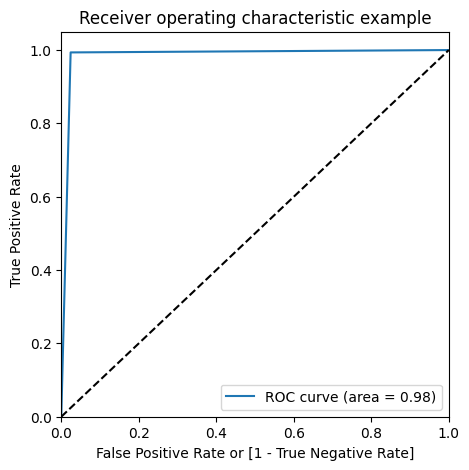

AUC         :  0.984714437908194
Accuracy    :  0.984714437908194
Sensitivity :  0.9935615359673908
Specificity :  0.9758673398489972
Pricision   :  0.9762869236721132
Recall      :  0.9935615359673908
[[21068   521]
 [  139 21450]]


In [ ]:
# Decision Tree Model with default parameters and SMOTE train data
dt_smte = DecisionTreeClassifier(max_depth=10)
dt_smte.fit(X_train_smte, y_train_smte)
y_train_pred = dt_smte.predict(X_train_smte)
y_test_pred = dt_smte.predict(X_test)
draw_roc(y_train_smte, y_train_pred)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9879336699244986
Accuracy    :  0.9761063976152259
Sensitivity :  1.0
Specificity :  0.9758673398489972
Pricision   :  0.2930800542740841
Recall      :  1.0
[[21068   521]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8900935107317685
Accuracy    :  0.9720706260032103
Sensitivity :  0.8064516129032258
Specificity :  0.9737354085603113
Pricision   :  0.2358490566037736
Recall      :  0.8064516129032258
[[9009  243]
 [  18   75]]


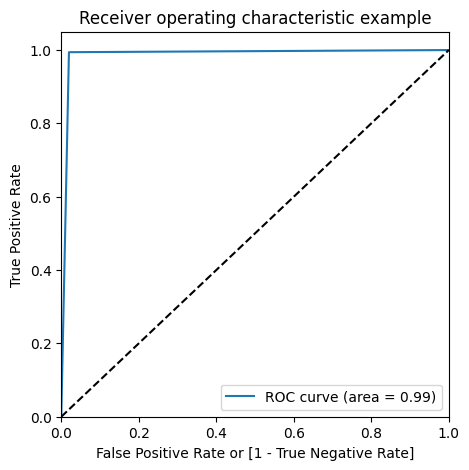

AUC         :  0.9871956573294506
Accuracy    :  0.9871993703849448
Sensitivity :  0.9941699056079956
Specificity :  0.9802214090509056
Pricision   :  0.9805138502258933
Recall      :  0.9941699056079956
[[21162   427]
 [  126 21486]]


In [ ]:
# Decision Tree Model with default parameters and ADASYN train data
dt_ada = DecisionTreeClassifier(max_depth=10)
dt_ada.fit(X_train_ada, y_train_ada)
y_train_pred = dt_ada.predict(X_train_ada)
y_test_pred = dt_ada.predict(X_test)
draw_roc(y_train_ada, y_train_pred)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9901107045254528
Accuracy    :  0.9804173354735153
Sensitivity :  1.0
Specificity :  0.9802214090509056
Pricision   :  0.3359253499222395
Recall      :  1.0
[[21162   427]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8541344155753594
Accuracy    :  0.9746388443017656
Sensitivity :  0.7311827956989247
Specificity :  0.9770860354517942
Pricision   :  0.24285714285714285
Recall      :  0.7311827956989247
[[9040  212]
 [  25   68]]


Based on the AUC, cost and other metrices, Decision Tree created on undersampled data seems to be more accurate that rest of the models. Lets create a dataset to store all the important features of a model.

- Let's use the GridSearch CV method to test various parameters on the best model till now.
- Also let's define a new metric/ score for model evaluation. This is based on cost of the model. Lower the cost, better its rank.

In [ ]:
# Lets define a new custom score to be used for various Grid Search CV models. Instead of using Accuracy or Precision,
# we will directly use the cost of model. Lower the cose, better the rating.
# This way we will reduce score for False Negatives as well as False Posotoves.
from sklearn.metrics import make_scorer

# Function to calculate Monthly cost of the model
def my_score(a, p):
  cm = confusion_matrix(a, p)
  TP = cm[1,1] # true positive
  TN = cm[0,0] # true negatives
  FP = cm[0,1] # false positives
  FN = cm[1,0] # false negatives
  tfpm = round((TP + FP)/ 24, 0)
  c1 = 1.5 * tfpm
  c2 = round (530.66 * round(FN/24,0), 2)
  c3 = c1 + c2

  return c3

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Parameter Grid to be tested
params = {
    'max_depth': [6, 8, 10],
    'max_features': [8, 12, 14, 17],
    'class_weight': ['balanced'],
    'min_samples_leaf': [50, 100, 500, 750],
    'random_state':[0, 21, 42, 63, 100]
}
dt = DecisionTreeClassifier()

In [ ]:
# Instantiate the grid search model
my_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_dt_us = GridSearchCV(estimator=dt,
                                  param_grid=params,
                                  cv=3, n_jobs=-1, verbose=2, scoring = my_scorer)

In [ ]:
# Fitting the data as per the grid defined
grid_search_dt_us.fit(X_train_us, y_train_us)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [6, 8, 10],
                         'max_features': [8, 12, 14, 17],
                         'min_samples_leaf': [50, 100, 500, 750],
                         'random_state': [0, 21, 42, 63, 100]},
             scoring=make_scorer(my_score, greater_is_better=False), verbose=2)

In [ ]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_dt_us.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_max_features,param_min_samples_leaf,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
81,0.016308,0.002782,0.011464,0.005327,balanced,8,8,50,21,"{'class_weight': 'balanced', 'max_depth': 8, '...",-535.16,-6.0,-535.16,-358.773333,249.448416,1
1,0.010475,0.004629,0.003911,0.000193,balanced,6,8,50,21,"{'class_weight': 'balanced', 'max_depth': 6, '...",-535.16,-6.0,-535.16,-358.773333,249.448416,1
2,0.008398,0.004212,0.005837,0.001660,balanced,6,8,50,42,"{'class_weight': 'balanced', 'max_depth': 6, '...",-535.16,-6.0,-535.16,-358.773333,249.448416,1
162,0.006050,0.000534,0.003975,0.000205,balanced,10,8,50,42,"{'class_weight': 'balanced', 'max_depth': 10, ...",-535.16,-6.0,-535.16,-358.773333,249.448416,1
82,0.013312,0.000924,0.005783,0.002783,balanced,8,8,50,42,"{'class_weight': 'balanced', 'max_depth': 8, '...",-535.16,-6.0,-535.16,-358.773333,249.448416,1


In [ ]:
# Getting the best model based on the score
dt_best = grid_search_dt_us.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_features=8,
                       min_samples_leaf=50, random_state=21)

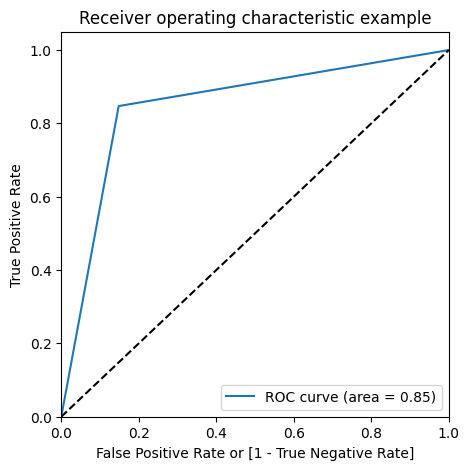

Accuracy    :  0.8495370370370371
Sensitivity :  0.8472222222222222
Specificity :  0.8518518518518519
Pricision   :  0.8511627906976744
Recall      :  0.8472222222222222
[[184  32]
 [ 33 183]]


In [ ]:
# Test the performance of best model on train dataset
y_train_pred = dt_best.predict(X_train_us)
draw_roc(y_train_us, y_train_pred)
model_metrics(y_train_us, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.8507962516919625
Accuracy    :  0.854299472598028
Sensitivity :  0.8472222222222222
Specificity :  0.8543702811617028
Pricision   :  0.05500450856627592
Recall      :  0.8472222222222222
[[18445  3144]
 [   33   183]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8280267213366247
Accuracy    :  0.8597110754414126
Sensitivity :  0.7956989247311828
Specificity :  0.8603545179420666
Pricision   :  0.05417276720351391
Recall      :  0.7956989247311828
[[7960 1292]
 [  19   74]]


### XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBOOST estimator on Undersampled data
xgb_us = XGBClassifier(max_depth=10, n_estimators = 10, max_features = 17, random_state=100)
xgb_us.fit(X_train_us, y_train_us)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features=17,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

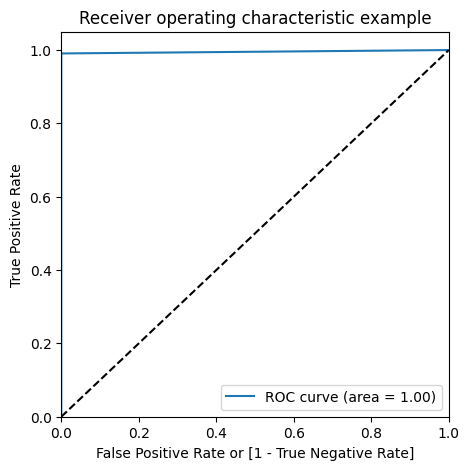

Accuracy    :  0.9953703703703703
Sensitivity :  0.9907407407407407
Specificity :  1.0
Pricision   :  1.0
Recall      :  0.9907407407407407
[[216   0]
 [  2 214]]


In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_us.predict(X_train_us)
draw_roc(y_train_us, y_train_pred)
model_metrics(y_train_us, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9664436021087556
Accuracy    :  0.9426278376519147
Sensitivity :  0.9907407407407407
Specificity :  0.9421464634767706
Pricision   :  0.14627477785372522
Recall      :  0.9907407407407407
[[20340  1249]
 [    2   214]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8930902472699888
Accuracy    :  0.9463884430176565
Sensitivity :  0.8387096774193549
Specificity :  0.9474708171206225
Pricision   :  0.13829787234042554
Recall      :  0.8387096774193549
[[8766  486]
 [  15   78]]


In [ ]:
# XGBOOST estimator on Oversampled data
xgb_ro = XGBClassifier(max_depth=10, n_estimators = 10, max_features = 17, random_state=41)
xgb_ro.fit(X_train_ro, y_train_ro)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features=17,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9987725230441428
Accuracy    :  0.9987725230441429
Sensitivity :  1.0
Specificity :  0.9975450460882856
Pricision   :  0.9975510581277146
Recall      :  1.0
[[21536    53]
 [    0 21589]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9987725230441428
Accuracy    :  0.9975693648245815
Sensitivity :  1.0
Specificity :  0.9975450460882856
Pricision   :  0.8029739776951673
Recall      :  1.0
[[21536    53]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8795587353388282
Accuracy    :  0.9933654360620653
Sensitivity :  0.7634408602150538
Specificity :  0.9956766104626027
Pricision   :  0.6396396396396397
Recall      :  0.7634408602150538
[[9212   40]
 [  22   71]]


In [ ]:
# XGBOOST estimator on SMOTE
xgb_smte = XGBClassifier(max_depth=10, n_estimators = 10, max_features = 17, random_state=41)
xgb_smte.fit(X_train_smte, y_train_smte)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features=17,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_smte.predict(X_train_smte)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

AUC         :  0.9983324841354394
Accuracy    :  0.9983324841354393
Sensitivity :  0.9997220806892398
Specificity :  0.9969428875816388
Pricision   :  0.9969513603399696
Recall      :  0.9997220806892398
[[21523    66]
 [    6 21583]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9961566289760045
Accuracy    :  0.9969273102499426
Sensitivity :  0.9953703703703703
Specificity :  0.9969428875816388
Pricision   :  0.7651245551601423
Recall      :  0.9953703703703703
[[21523    66]
 [    1   215]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9107899948398256
Accuracy    :  0.9919743178170144
Sensitivity :  0.8279569892473119
Specificity :  0.993623000432339
Pricision   :  0.5661764705882353
Recall      :  0.8279569892473119
[[9193   59]
 [  16   77]]


In [ ]:
# XGBOOST estimator on ADASYN
xgb_ada = XGBClassifier(loss = 'exponential', max_depth=8, n_estimators = 10, max_features = 14, random_state=63)
xgb_ada.fit(X_train_ada, y_train_ada)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              loss='exponential', max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_features=14, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=10, n_jobs=None, ...)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ada.predict(X_train_ada)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

AUC         :  0.994790910769735
Accuracy    :  0.9947917872271476
Sensitivity :  0.9964371645382195
Specificity :  0.9931446570012507
Pricision   :  0.9931743762394503
Recall      :  0.9964371645382195
[[21441   148]
 [   77 21535]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9965723285006254
Accuracy    :  0.9932125659252465
Sensitivity :  1.0
Specificity :  0.9931446570012507
Pricision   :  0.5934065934065934
Recall      :  1.0
[[21441   148]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9085742577019094
Accuracy    :  0.9875869448903157
Sensitivity :  0.8279569892473119
Specificity :  0.9891915261565067
Pricision   :  0.4350282485875706
Recall      :  0.8279569892473119
[[9152  100]
 [  16   77]]


XGBOOST seems to have reduced the count of False Positives and cost better than Decision tree. It has also increased the count of True Positives. Among various models of XGBOOST, the one on over sampled data seems best. Lets try GridSearch CV to test various parameters on random oversampled data.

In [ ]:
params = {
    'learning_rate': [0.1, 0.5, 0.9],
    'max_depth': [8, 10],
    'n_estimators': [10, 15],
    'max_features': [14],
    'class_weight': ['balanced']
}

In [ ]:
# XGB - GridSearch CV on Oversampled data
xgb_ro = XGBClassifier()
my_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_xgb_ro = GridSearchCV(estimator=xgb_ro,
                                    param_grid=params,
                                    cv=3, n_jobs=-1, verbose=1, scoring = my_scorer)
grid_search_xgb_ro.fit(X_train_ro, y_train_ro)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'learning_rate': [0.1, 0.5, 0.9], 'max_depth': [8, 10],
                         'max_features': [14], 'n_estimators': [10, 15]},
             scoring=make_scorer(my_score, greater_is_better=False), verbose=1)

In [ ]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_xgb_ro.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)

In [ ]:
# Getting the best model based on the score
dt_best = grid_search_xgb_ro.best_estimator_
dt_best

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features=14,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=15,
              n_jobs=None, ...)

In [ ]:
# Test the performance of best model on train dataset
y_train_pred = dt_best.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  1.0
Accuracy    :  1.0
Sensitivity :  1.0
Specificity :  1.0
Pricision   :  1.0
Recall      :  1.0
[[21589     0]
 [    0 21589]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  1.0
Accuracy    :  1.0
Sensitivity :  1.0
Specificity :  1.0
Pricision   :  1.0
Recall      :  1.0
[[21589     0]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8755874928524608
Accuracy    :  0.9960406634563937
Sensitivity :  0.7526881720430108
Specificity :  0.9984868136619109
Pricision   :  0.8333333333333334
Recall      :  0.7526881720430108
[[9238   14]
 [  23   70]]


In [ ]:
# Checking the best parameters derived for XGB on under sampled data
xgb_us = XGBClassifier(learning_rate=0.7, max_depth=10, n_estimators=20)
xgb_us.fit(X_train_us, y_train_us)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_us.predict(X_train_us)
print ('AUC         : ', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

AUC         :  1.0
Accuracy    :  1.0
Sensitivity :  1.0
Specificity :  1.0
Pricision   :  1.0
Recall      :  1.0
[[216   0]
 [  0 216]]


This is very interesting. The model seems to have worked perfectly.Lets check its performance on test datasets.

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9710500717958219
Accuracy    :  0.9426736986929604
Sensitivity :  1.0
Specificity :  0.9421001435916438
Pricision   :  0.14733969986357434
Recall      :  1.0
[[20339  1250]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9147037083525096
Accuracy    :  0.9470304975922953
Sensitivity :  0.8817204301075269
Specificity :  0.9476869865974924
Pricision   :  0.14487632508833923
Recall      :  0.8817204301075269
[[8768  484]
 [  11   82]]


The model has worked well to identify true positives. However, a lot of transactions were incorrectly classified as Fraud.This happened because undersampling removed non fraud data to balance the data.

In [ ]:
# Slight modification in best parameters for Over Sampled Data
xgb_ro = XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators=15, max_features = 14)
xgb_ro.fit(X_train_ro, y_train_ro)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features=14,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=15,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.99993052017231
Accuracy    :  0.99993052017231
Sensitivity :  1.0
Specificity :  0.99986104034462
Pricision   :  0.9998610596517229
Recall      :  1.0
[[21586     3]
 [    0 21589]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.99993052017231
Accuracy    :  0.9998624168768631
Sensitivity :  1.0
Specificity :  0.99986104034462
Pricision   :  0.9863013698630136
Recall      :  1.0
[[21586     3]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8808017098308301
Accuracy    :  0.9958266452648475
Sensitivity :  0.7634408602150538
Specificity :  0.9981625594466061
Pricision   :  0.8068181818181818
Recall      :  0.7634408602150538
[[9235   17]
 [  22   71]]


In [ ]:
# Checking the best parameters derived for XGB on SMOTE data
xgb_smte = XGBClassifier(learning_rate=0.5, max_depth=10, max_features=14, n_estimators=15)
xgb_smte.fit(X_train_smte, y_train_smte)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features=14,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=15,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_smte.predict(X_train_smte)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

AUC         :  0.9999768400574366
Accuracy    :  0.9999768400574367
Sensitivity :  1.0
Specificity :  0.9999536801148733
Pricision   :  0.9999536822603057
Recall      :  1.0
[[21588     1]
 [    0 21589]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9999768400574366
Accuracy    :  0.9999541389589544
Sensitivity :  1.0
Specificity :  0.9999536801148733
Pricision   :  0.9953917050691244
Recall      :  1.0
[[21588     1]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9231639540883925
Accuracy    :  0.9953986088817549
Sensitivity :  0.8494623655913979
Specificity :  0.996865542585387
Pricision   :  0.7314814814814815
Recall      :  0.8494623655913979
[[9223   29]
 [  14   79]]


In [ ]:
# Checking the best parameters derived for XGB on ADASYN data
xgb_ada = XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators = 15, max_features = 14)
xgb_ada.fit(X_train_ada, y_train_ada)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features=14,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=15,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ada.predict(X_train_ada)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

AUC         :  0.9999536801148733
Accuracy    :  0.9999537047753524
Sensitivity :  1.0
Specificity :  0.9999073602297466
Pricision   :  0.9999074673822522
Recall      :  1.0
[[21587     2]
 [    0 21612]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9999536801148733
Accuracy    :  0.9999082779179087
Sensitivity :  1.0
Specificity :  0.9999073602297466
Pricision   :  0.9908256880733946
Recall      :  1.0
[[21587     2]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9016045353750889
Accuracy    :  0.9948635634028893
Sensitivity :  0.8064516129032258
Specificity :  0.996757457846952
Pricision   :  0.7142857142857143
Recall      :  0.8064516129032258
[[9222   30]
 [  18   75]]


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Will start from the feature values that worked best till now
# Random Forest on Under Sampled data
rf_us = RandomForestClassifier(n_estimators=20, max_depth=10, bootstrap=True, oob_score=True, n_jobs=-1)
rf_us.fit(X_train_us, y_train_us)

RandomForestClassifier(max_depth=10, n_estimators=20, n_jobs=-1, oob_score=True)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = rf_us.predict(X_train_us)
print ('AUC         : ', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

AUC         :  1.0
Accuracy    :  1.0
Sensitivity :  1.0
Specificity :  1.0
Pricision   :  1.0
Recall      :  1.0
[[216   0]
 [  0 216]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9799666496827089
Accuracy    :  0.9603301994955286
Sensitivity :  1.0
Specificity :  0.9599332993654176
Pricision   :  0.1998149861239593
Recall      :  1.0
[[20724   865]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = rf_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9382365451933671
Accuracy    :  0.962011771000535
Sensitivity :  0.9139784946236559
Specificity :  0.9624945957630783
Pricision   :  0.19675925925925927
Recall      :  0.9139784946236559
[[8905  347]
 [   8   85]]


In [ ]:
# Random Forest on Over Sampled data
rf_ro = RandomForestClassifier(n_estimators=10, max_depth=10, max_features = 12, bootstrap=True, oob_score=True, n_jobs=-1, random_state=0)
rf_ro.fit(X_train_ro, y_train_ro)

RandomForestClassifier(max_depth=10, max_features=12, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=0)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = rf_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9950900921765714
Accuracy    :  0.9950900921765714
Sensitivity :  1.0
Specificity :  0.9901801843531428
Pricision   :  0.9902756754277326
Recall      :  1.0
[[21377   212]
 [    0 21589]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9950900921765714
Accuracy    :  0.9902774592983261
Sensitivity :  1.0
Specificity :  0.9901801843531428
Pricision   :  0.5046728971962616
Recall      :  1.0
[[21377   212]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = rf_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8820167914871065
Accuracy    :  0.9876939539860888
Sensitivity :  0.7741935483870968
Specificity :  0.9898400345871163
Pricision   :  0.43373493975903615
Recall      :  0.7741935483870968
[[9158   94]
 [  21   72]]


In [ ]:
# Random Forest on SMOTE data
rf_smte = RandomForestClassifier(n_estimators=10, max_depth=12, max_features = 12, bootstrap=True, oob_score=True, n_jobs=-1, random_state=63)
rf_smte.fit(X_train_smte, y_train_smte)

RandomForestClassifier(max_depth=12, max_features=12, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=63)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = rf_smte.predict(X_train_smte)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

AUC         :  0.991013942285423
Accuracy    :  0.9910139422854232
Sensitivity :  0.9976376858585391
Specificity :  0.9843901987123072
Pricision   :  0.9845942857142858
Recall      :  0.9976376858585391
[[21252   337]
 [   51 21538]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9921950993561536
Accuracy    :  0.9845448291676221
Sensitivity :  1.0
Specificity :  0.9843901987123072
Pricision   :  0.39059674502712477
Recall      :  1.0
[[21252   337]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = rf_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8736681170941244
Accuracy    :  0.981701444622793
Sensitivity :  0.7634408602150538
Specificity :  0.9838953739731949
Pricision   :  0.32272727272727275
Recall      :  0.7634408602150538
[[9103  149]
 [  22   71]]


In [ ]:
# Random Forest on ADASYN data
rf_ada = RandomForestClassifier(n_estimators=15, max_depth=10, max_features = 14, bootstrap=True, oob_score=True, n_jobs=-1, random_state=63)
rf_ada.fit(X_train_ada, y_train_ada)

RandomForestClassifier(max_depth=10, max_features=14, n_estimators=15,
                       n_jobs=-1, oob_score=True, random_state=63)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = rf_ada.predict(X_train_ada)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

AUC         :  0.9887696461189067
Accuracy    :  0.9887734080229624
Sensitivity :  0.995835646862854
Specificity :  0.9817036453749595
Pricision   :  0.9819774604188529
Recall      :  0.995835646862854
[[21194   395]
 [   90 21522]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9908518226874797
Accuracy    :  0.9818848887869754
Sensitivity :  1.0
Specificity :  0.9817036453749595
Pricision   :  0.353518821603928
Recall      :  1.0
[[21194   395]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = rf_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8762342579808375
Accuracy    :  0.9762439807383627
Sensitivity :  0.7741935483870968
Specificity :  0.9782749675745784
Pricision   :  0.26373626373626374
Recall      :  0.7741935483870968
[[9051  201]
 [  21   72]]


In [ ]:
# Parameter tuining using GridSearch CV
params = {
    'max_depth': [8, 10],
    'n_estimators': [10, 15],
    'max_features': [12, 14],
#    'min_samples_split': [50, 100],
#    'min_samples_leaf':  [50, 100],
#    'max_leaf_nodes': [200, 250, 300],
    'random_state':[21, 41]
}

In [ ]:
# Random Forest with GridSearch CV on Over Sampled data
rf_ro = RandomForestClassifier()
y_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_rf_ro = GridSearchCV(estimator=rf_ro,
                                    param_grid=params,
                                    cv=2, n_jobs=-1, verbose=1, scoring = my_scorer)
grid_search_rf_ro.fit(X_train_ro, y_train_ro)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [12, 14],
                         'n_estimators': [10, 15], 'random_state': [21, 41]},
             scoring=make_scorer(my_score, greater_is_better=False), verbose=1)

In [ ]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_rf_ro.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
8,1.030645,0.001160,0.060460,0.000624,10,12,10,21,"{'max_depth': 10, 'max_features': 12, 'n_estim...",-684.0,-682.5,-683.25,0.75,1
9,1.010810,0.001753,0.058355,0.000788,10,12,10,41,"{'max_depth': 10, 'max_features': 12, 'n_estim...",-684.0,-682.5,-683.25,0.75,1
10,2.246758,0.368638,0.151652,0.010241,10,12,15,21,"{'max_depth': 10, 'max_features': 12, 'n_estim...",-684.0,-682.5,-683.25,0.75,1
11,2.678661,0.061221,0.075908,0.006860,10,12,15,41,"{'max_depth': 10, 'max_features': 12, 'n_estim...",-684.0,-682.5,-683.25,0.75,1
12,1.169892,0.111932,0.073482,0.001632,10,14,10,21,"{'max_depth': 10, 'max_features': 14, 'n_estim...",-684.0,-682.5,-683.25,0.75,1


In [ ]:
# Getting the best model based on the score
dt_best = grid_search_rf_ro.best_estimator_
dt_best

RandomForestClassifier(max_depth=10, max_features=12, n_estimators=10,
                       random_state=21)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = dt_best.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9951595720042614
Accuracy    :  0.9951595720042614
Sensitivity :  1.0
Specificity :  0.9903191440085228
Pricision   :  0.9904119644004037
Recall      :  1.0
[[21380   209]
 [    0 21589]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9951595720042614
Accuracy    :  0.9904150424214629
Sensitivity :  1.0
Specificity :  0.9903191440085228
Pricision   :  0.508235294117647
Recall      :  1.0
[[21380   209]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8765323626626501
Accuracy    :  0.9873729266987694
Sensitivity :  0.7634408602150538
Specificity :  0.9896238651102465
Pricision   :  0.4251497005988024
Recall      :  0.7634408602150538
[[9156   96]
 [  22   71]]


In [ ]:
# Slight modifications on the best parameters obtained
rf_ro = RandomForestClassifier(n_estimators=10, max_depth=12, max_features = 10, random_state=42, bootstrap=True, oob_score=True, n_jobs=-1)
rf_ro.fit(X_train_ro, y_train_ro)

RandomForestClassifier(max_depth=12, max_features=10, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# Predection & Stats on Train Dataset
y_train_pred = rf_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9977534855713558
Accuracy    :  0.9977534855713558
Sensitivity :  1.0
Specificity :  0.9955069711427116
Pricision   :  0.9955270681545698
Recall      :  1.0
[[21492    97]
 [    0 21589]]


In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9977534855713558
Accuracy    :  0.9955514790185738
Sensitivity :  1.0
Specificity :  0.9955069711427116
Pricision   :  0.6900958466453674
Recall      :  1.0
[[21492    97]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = rf_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8524068030626335
Accuracy    :  0.9922953451043338
Sensitivity :  0.7096774193548387
Specificity :  0.995136186770428
Pricision   :  0.5945945945945946
Recall      :  0.7096774193548387
[[9207   45]
 [  27   66]]


### Model Selection
- Now that we have multiple models ranging in recall, precision & cost; let's try to pick the one which is best.
- The best model for our case will be the one which identifies maximum Frauds (high TP), leaves very less Frauds undetected (low FN) and less incorrectly identified frauds (less FP).
- Based on the above, we will use the metrices of Precision and Recall and also the custom metric for Price to pick the best suited model.
- Higher recall will ensure that the model allowed very few actual fraud cases let go. Most of them were captured.
- High precision would ensure we only identify actual frauds as fraud. Identifying a legitimate transaction as fraud would lower the precision. However, there is a trade-off between Precision & Recall and hence we compromised a bit on Precision to get better Recall.

In [ ]:
# Top train-test models in terms of Precision
best_prec_tt = model_selector_tt[(model_selector_tt.Precision >= 0.55)]
best_prec_tt.sort_values(['Precision'], ascending=False)

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final


In [ ]:
# Top train-test models in terms of Recall
best_recall_tt = model_selector_tt[(model_selector_tt.Recall >= 0.97)]
best_recall_tt.sort_values(['Recall'], ascending=False)

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final


Based on the train-test metrices, only model 11 (XGB - RO - 2) seems to have high recall & precision. Lets see the same lists for overall metrices.

In [ ]:
# Top overall models in terms of Precision
best_prec = model_selector[(model_selector.Precision >= 0.50)]
best_prec.sort_values(['Precision'], ascending=False)

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final,cost_scaled


In [ ]:
# Top overall models in terms of Recall
best_recall = model_selector[(model_selector.Recall >= 0.95)]
best_recall.sort_values(['Recall'], ascending=False)

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final,cost_scaled


In [ ]:
# Select the best model in terms of Precision & Recall from the Train-Test metrics dataset
best_tt = model_selector_tt[(model_selector_tt.Precision >= 0.55) & (model_selector_tt.Recall >=.95)]
best_tt

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final


In [ ]:
# Select the best model in terms of Precision & Recall from the Train-Test metrics dataset
best_overall = model_selector[(model_selector.Precision >= 0.55) & (model_selector.Recall >=.95)]
best_overall

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final,cost_scaled


In [ ]:
# Scaling the cost field & keeping only the most needed measures. We have only selected high Accuracy and ROC models. Hence, dropping thoese 2 fields also.
model_selector['cost_scaled'] = model_selector['Cost']/100000

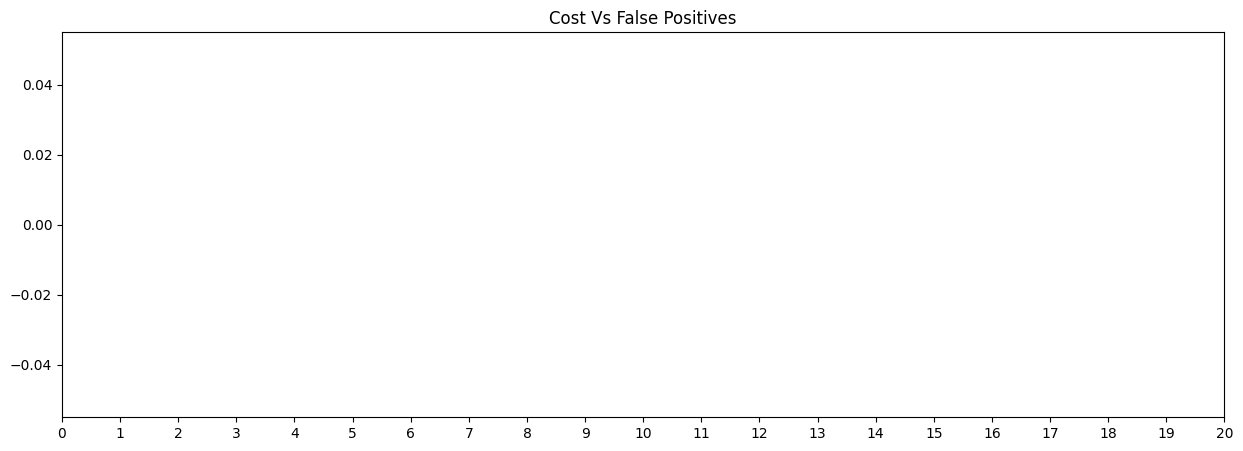

In [ ]:
# Check the relation between Cost and False Positive cases (we want both to be less)
plt.figure(figsize = (15,5))
plt.title('Cost Vs False Positives')
plt.xticks(np.arange(0,21,1))
plt.plot(model_selector.Cost, 'g')
plt.plot(model_selector.FP, 'r')
plt.show()

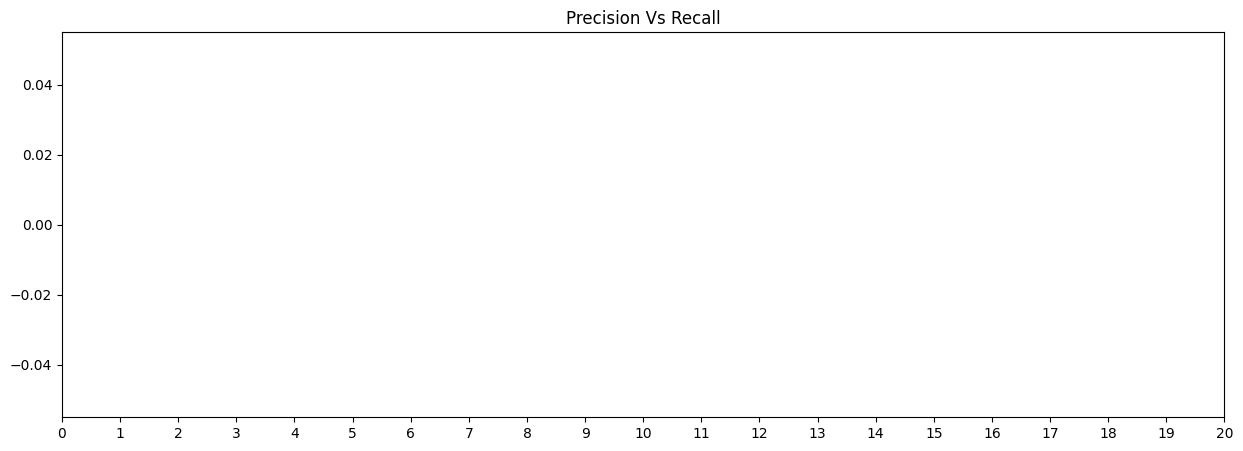

In [ ]:
# Check the relation between Precision and Recall
plt.figure(figsize = (15,5))
plt.title('Precision Vs Recall')
plt.xticks(np.arange(0,21,1))
plt.plot(model_selector.Precision, 'g')
plt.plot(model_selector.Recall/2, 'r')
plt.show()

In [ ]:
# Parameter grid for GridSearch CV method
params = {
    'learning_rate': [0.5],
    'max_depth': [10],
    'n_estimators': [15],
    'max_features': [14],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_leaf_nodes': [5, 10, 15]
#    'random_state': [41, 63],
}

In [ ]:
# XGB on Over Sampled data with parameter tuining
xgb_ro = XGBClassifier()
my_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_xgb_ro = GridSearchCV(estimator=xgb_ro,
                                    param_grid=params,
                                    cv=3, n_jobs=-1, verbose=1, scoring = my_scorer)
grid_search_xgb_ro.fit(X_train_ro, y_train_ro)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5], 'max_depth': [10],
                         'max_features': [14], 'max_leaf_nodes': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [15]},
             scoring=make_scorer(my_score, greater_is_better=False), verbose=1)

In [ ]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_xgb_ro.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)

In [ ]:
# Getting the best model based on the score
dt_best = grid_search_xgb_ro.best_estimator_
dt_best

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features=14,
              max_leaf_nodes=5, max_leaves=None, min_child_weight=None,
              min_samples_leaf=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=15, ...)

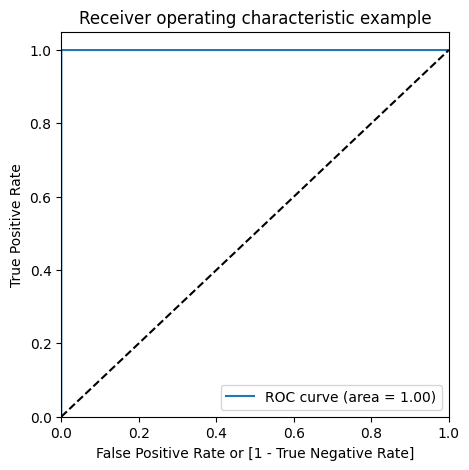

Accuracy    :  0.99993052017231
Sensitivity :  1.0
Specificity :  0.99986104034462
Pricision   :  0.9998610596517229
Recall      :  1.0
[[21586     3]
 [    0 21589]]


In [ ]:
# Test the performance of best model on train dataset
y_train_pred = dt_best.predict(X_train_ro)
draw_roc(y_train_ro, y_train_pred)
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.99993052017231
Accuracy    :  0.9998624168768631
Sensitivity :  1.0
Specificity :  0.99986104034462
Pricision   :  0.9863013698630136
Recall      :  1.0
[[21586     3]
 [    0   216]]


In [ ]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.8808017098308301
Accuracy    :  0.9958266452648475
Sensitivity :  0.7634408602150538
Specificity :  0.9981625594466061
Pricision   :  0.8068181818181818
Recall      :  0.7634408602150538
[[9235   17]
 [  22   71]]


Even with hyper parameter tuining the result remains the same So, we will finalize the model 11.

### Final Model

In [ ]:
# four best models that balances TP, FP, FN and Cost
final_models = model_selector[(model_selector.index == 9) |
                              (model_selector.index == 10) |
                              (model_selector.index == 11) |
                              (model_selector.index == 13)
                              ]
final_models

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final,cost_scaled


In [ ]:
# Final Model
xgb_ro = XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators=15, max_features = 14)
xgb_ro.fit(X_train_ro, y_train_ro)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_features=14,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=15,
              n_jobs=None, num_parallel_tree=None, ...)

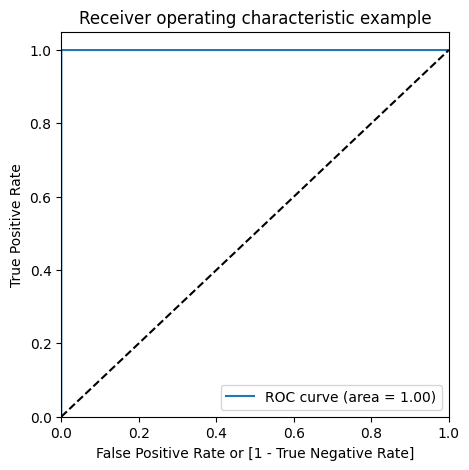

Accuracy    :  0.99993052017231
Sensitivity :  1.0
Specificity :  0.99986104034462
Pricision   :  0.9998610596517229
Recall      :  1.0
[[21586     3]
 [    0 21589]]


In [ ]:
# Model performance on train data
y_train_pred = xgb_ro.predict(X_train_ro)
draw_roc(y_train_ro, y_train_pred)
model_metrics(y_train_ro, y_train_pred)

In [ ]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.99993052017231
Accuracy    :  0.9998624168768631
Sensitivity :  1.0
Specificity :  0.99986104034462
Pricision   :  0.9863013698630136
Recall      :  1.0
[[21586     3]
 [    0   216]]


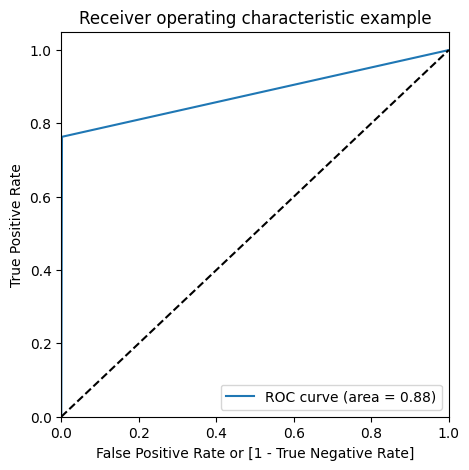

Accuracy    :  0.9958266452648475
Sensitivity :  0.7634408602150538
Specificity :  0.9981625594466061
Pricision   :  0.8068181818181818
Recall      :  0.7634408602150538
[[9235   17]
 [  22   71]]


In [ ]:
# Model performance on test data
y_test_pred = xgb_ro.predict(X_test)
draw_roc(y_test, y_test_pred)
model_metrics(y_test, y_test_pred)

In [ ]:
# Extracting the features significance
imp_df = pd.DataFrame({
    "Varname": X_train_smte.columns,
    "Imp": xgb_ro.feature_importances_})

imp_df.sort_values(by="Imp", ascending=False)

NameError: name 'pd' is not defined